In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [12]:
csv_path = '/Users/mpillodi/documents/GitHub/wind-data-analysis/csvfolder/2013_03_05_0000.csv'

In [13]:
df = pd.read_csv(csv_path)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    144 non-null    object 
 1   time    144 non-null    object 
 2   period  144 non-null    int64  
 3   s1a     144 non-null    float64
 4   s1x     144 non-null    float64
 5   s1i     144 non-null    float64
 6   s1s     144 non-null    float64
 7   s2a     144 non-null    float64
 8   s2x     144 non-null    float64
 9   s2i     144 non-null    float64
 10  s2s     144 non-null    float64
 11  s3a     144 non-null    float64
 12  s3x     144 non-null    float64
 13  s3i     144 non-null    float64
 14  s3s     144 non-null    float64
 15  d1a     144 non-null    int64  
 16  d1s     144 non-null    int64  
 17  d2a     144 non-null    int64  
 18  d2s     144 non-null    int64  
 19  h1a     144 non-null    int64  
 20  h1x     144 non-null    int64  
 21  h1i     144 non-null    int64  
 22  t1

In [14]:
# Convert 'date' and 'time' columns to datetime format and set as index
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df.head()

date      time  period       s1a      s1x     s1i  \
datetime                                                                       
2013-03-05 00:10:00  2013-03-05  00:10:00     600   9.30920  10.7321  7.7945   
2013-03-05 00:20:00  2013-03-05  00:20:00     600   8.74922  10.0436  7.3355   
2013-03-05 00:30:00  2013-03-05  00:30:00     600   9.41018  11.1452  7.5650   
2013-03-05 00:40:00  2013-03-05  00:40:00     600  10.01606  11.6501  8.2994   
2013-03-05 00:50:00  2013-03-05  00:50:00     600   9.45149  11.2829  7.2896   

                         s1s      s2a      s2x     s2i  ...  tii  vxa  vxx  \
datetime                                                ...                  
2013-03-05 00:10:00  0.50949  9.27148  10.7770  7.6099  ...   36  125  125   
2013-03-05 00:20:00  0.45900  8.72986   9.9508  7.2886  ...   36  125  125   
2013-03-05 00:30:00  0.56457  9.36328  11.0983  7.7476  ...   36  125  125   
2013-03-05 00:40:00  0.57375  9.97375  11.6950  8.2525  ...   36  125  125   
2013-03-05 00:50:00  0.67014  9.44590  11.3278  7.1968  ...   35  125  125   

                     vxi  bla  blx  bli  bra  brx  bri  
datetime                                                
2013-03-05 00:10:00  125   83   83   83   83   83   83  
2013-03-05 00:20:00  125   83   83   83   83   83   83  
2013-03-05 00:30:00  125   83   83   83   83   83   83  
2013-03-05 00:40:00  125   83   83   83   83   83   83  
2013-03-05 00:50:00  124   83   83   83   83   83   83  

[5 rows x 44 columns]


Analysis for column: s1a
Descriptive Statistics:
count    144.000000
mean       6.872452
std        2.695599
min        0.321980
25%        4.633138
50%        8.147930
75%        8.909870
max       10.479650
Name: s1a, dtype: float64


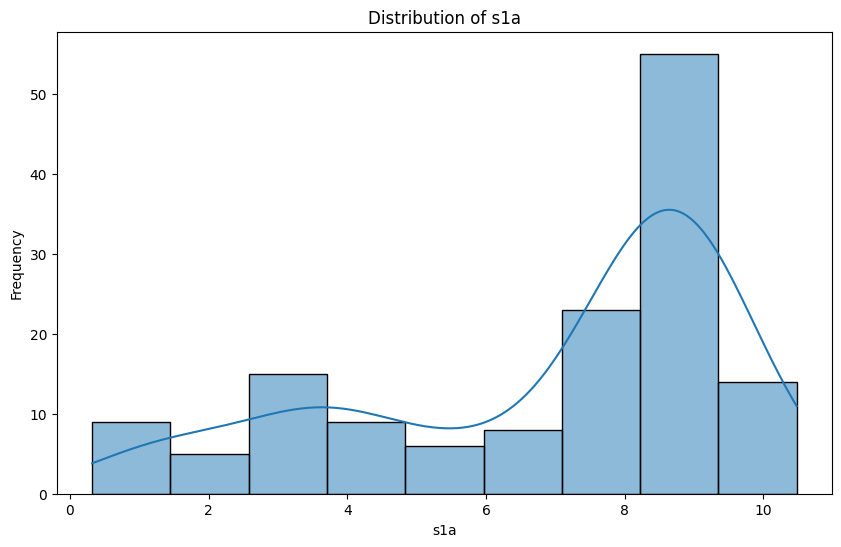


Analysis for column: s1x
Descriptive Statistics:
count    144.000000
mean       8.376537
std        3.505827
min        0.496400
25%        5.109350
50%        9.928850
75%       10.996025
max       13.532000
Name: s1x, dtype: float64


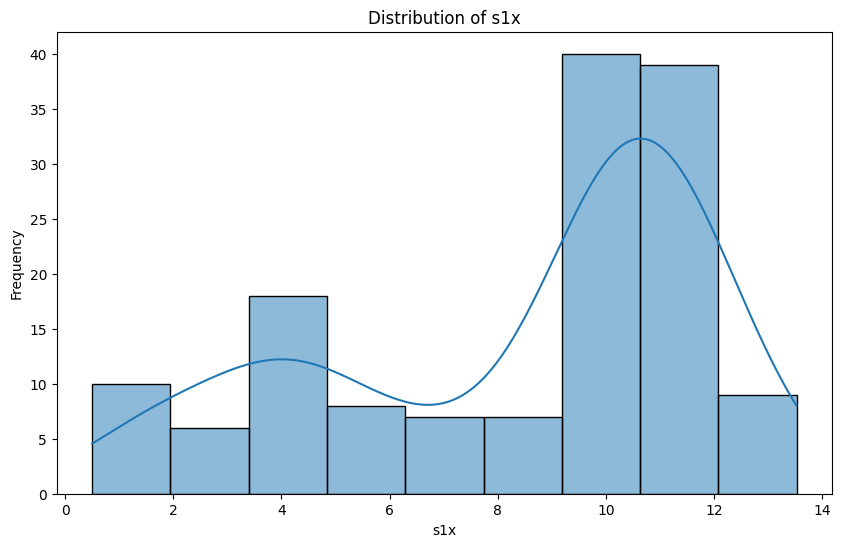


Analysis for column: s1i
Descriptive Statistics:
count    144.000000
mean       5.355106
std        1.972875
min        0.221000
25%        4.225775
50%        6.004400
75%        6.750275
max        8.666600
Name: s1i, dtype: float64


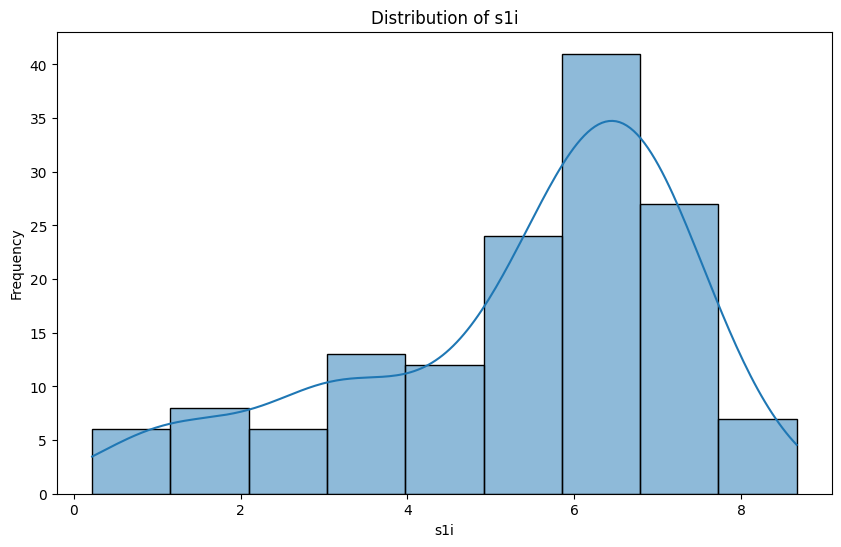


Analysis for column: s1s
Descriptive Statistics:
count    144.000000
mean       0.566387
std        0.351784
min        0.059670
25%        0.200813
50%        0.596700
75%        0.786037
max        1.565190
Name: s1s, dtype: float64


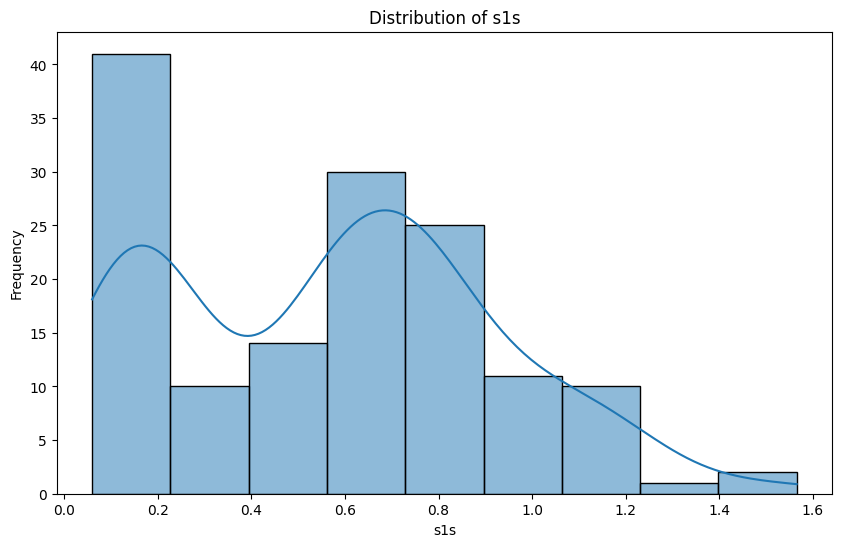


Analysis for column: s2a
Descriptive Statistics:
count    144.000000
mean       6.674114
std        2.740532
min        0.325570
25%        4.183465
50%        7.928905
75%        8.739040
max       10.497010
Name: s2a, dtype: float64


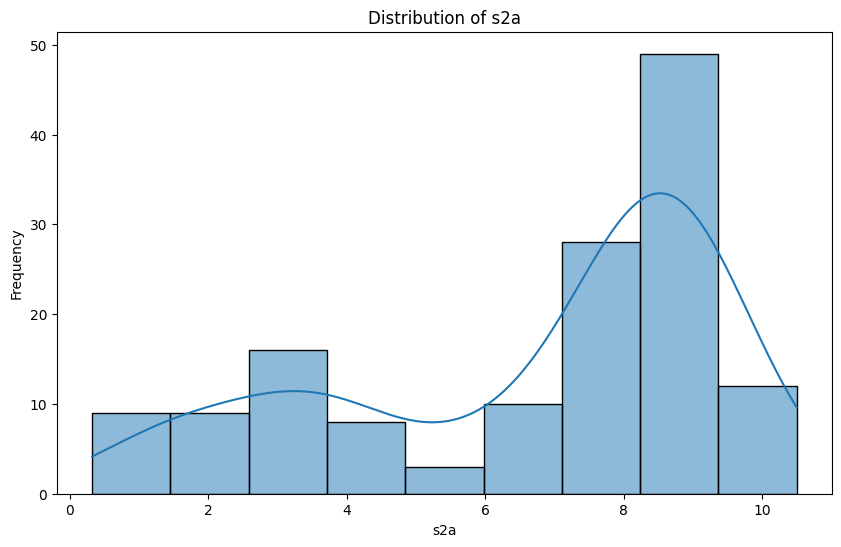


Analysis for column: s2x
Descriptive Statistics:
count    144.000000
mean       8.320394
std        3.540749
min        0.495400
25%        5.050975
50%        9.904900
75%       11.063875
max       13.347400
Name: s2x, dtype: float64


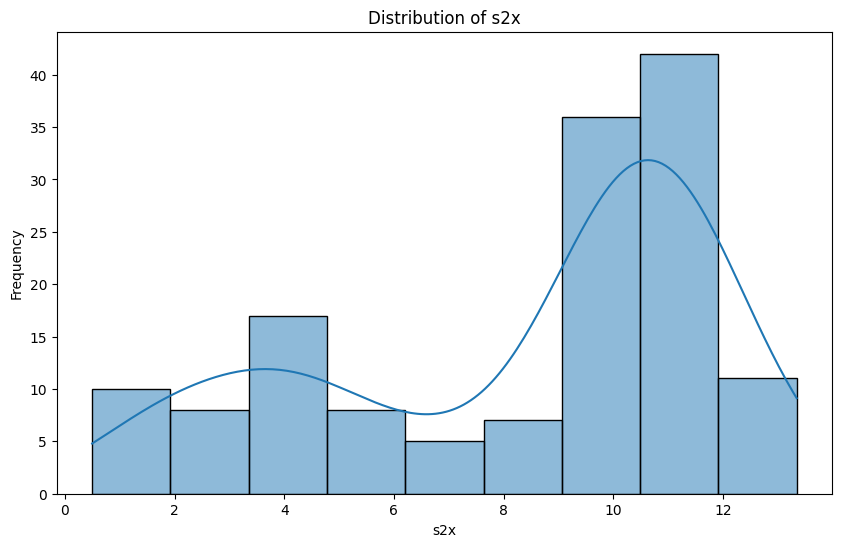


Analysis for column: s2i
Descriptive Statistics:
count    144.000000
mean       4.885225
std        2.069676
min        0.220000
25%        3.192025
50%        5.360800
75%        6.611575
max        8.665600
Name: s2i, dtype: float64


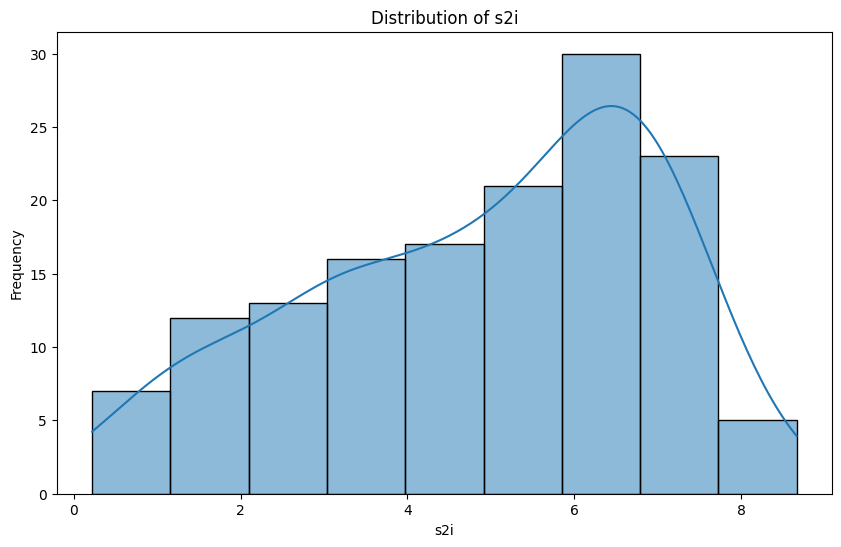


Analysis for column: s2s
Descriptive Statistics:
count    144.000000
mean       0.649517
std        0.384905
min        0.050490
25%        0.300645
50%        0.640305
75%        0.859478
max        1.656990
Name: s2s, dtype: float64


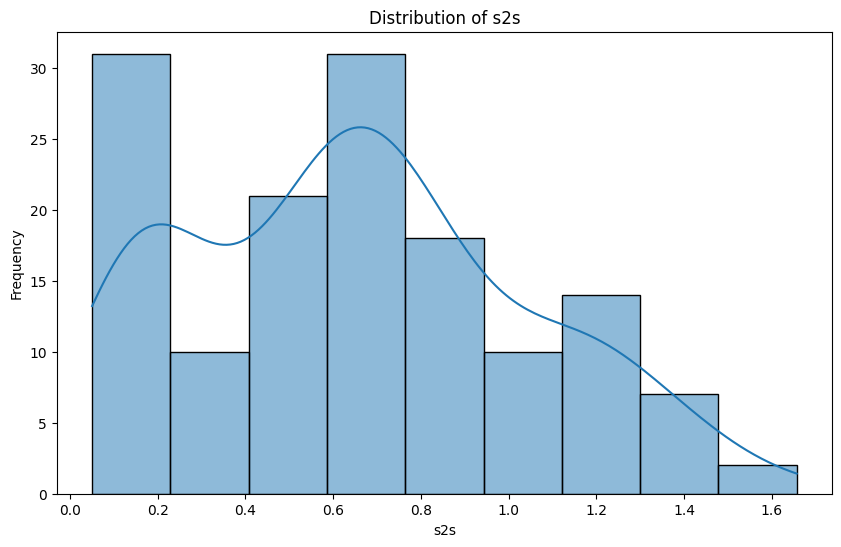


Analysis for column: s3a
Descriptive Statistics:
count    144.000000
mean       6.580868
std        2.646701
min        0.539500
25%        4.141443
50%        7.757150
75%        8.619502
max       10.447420
Name: s3a, dtype: float64


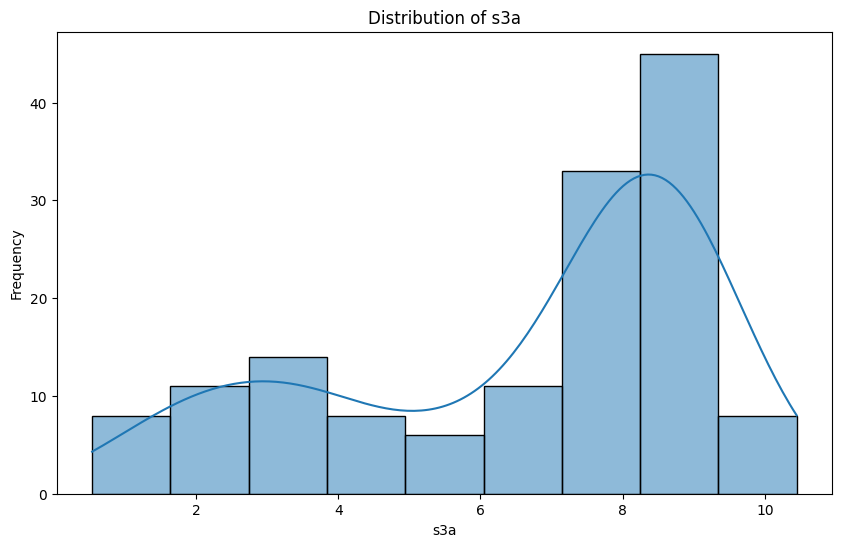


Analysis for column: s3x
Descriptive Statistics:
count    144.000000
mean       8.257258
std        3.488075
min        0.727570
25%        4.810000
50%        9.603415
75%       10.933645
max       13.341820
Name: s3x, dtype: float64


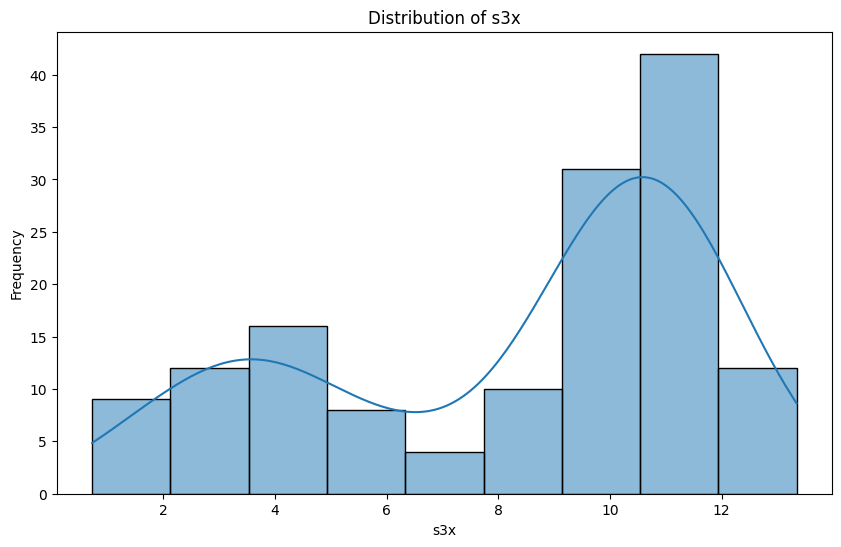


Analysis for column: s3i
Descriptive Statistics:
count    144.000000
mean       4.742151
std        1.908392
min        0.360610
25%        3.479770
50%        5.108155
75%        6.369580
max        9.030040
Name: s3i, dtype: float64


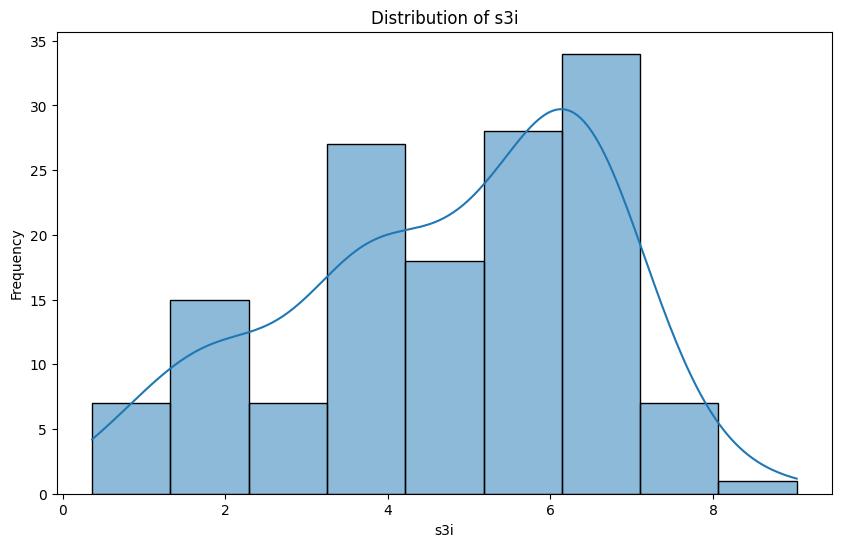


Analysis for column: s3s
Descriptive Statistics:
count    144.000000
mean       0.663331
std        0.397001
min        0.045870
25%        0.307330
50%        0.646770
75%        0.886437
max        1.697190
Name: s3s, dtype: float64


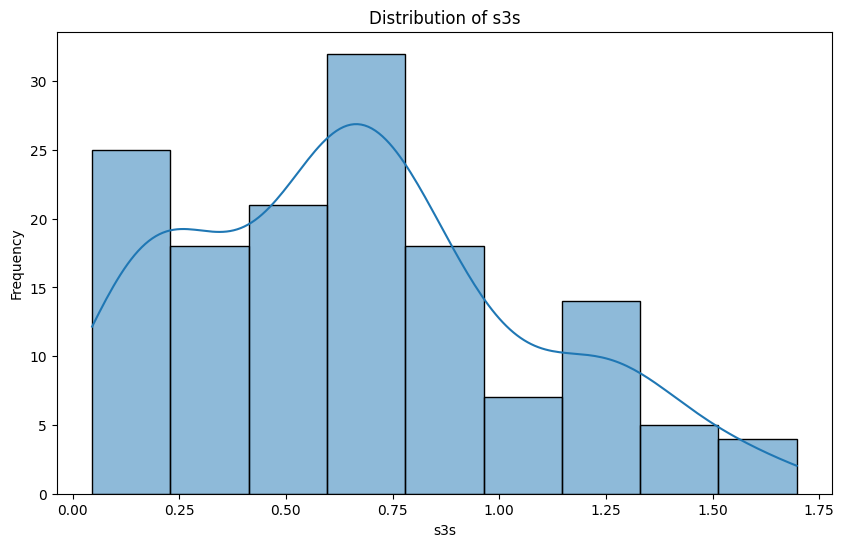


Analysis for column: d1a
Descriptive Statistics:
count    144.000000
mean     160.576389
std       17.082924
min      132.000000
25%      144.750000
50%      163.000000
75%      175.000000
max      194.000000
Name: d1a, dtype: float64


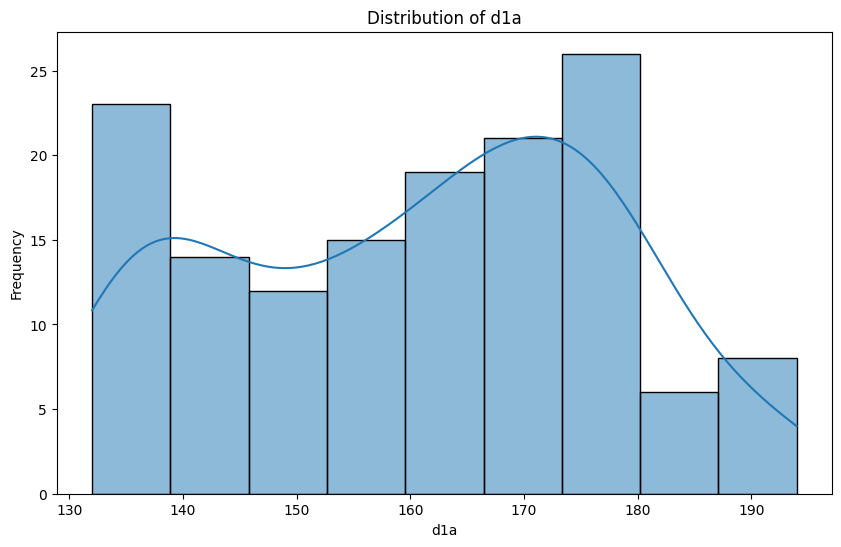


Analysis for column: d1s
Descriptive Statistics:
count    144.000000
mean       4.548611
std        2.451858
min        0.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       12.000000
Name: d1s, dtype: float64


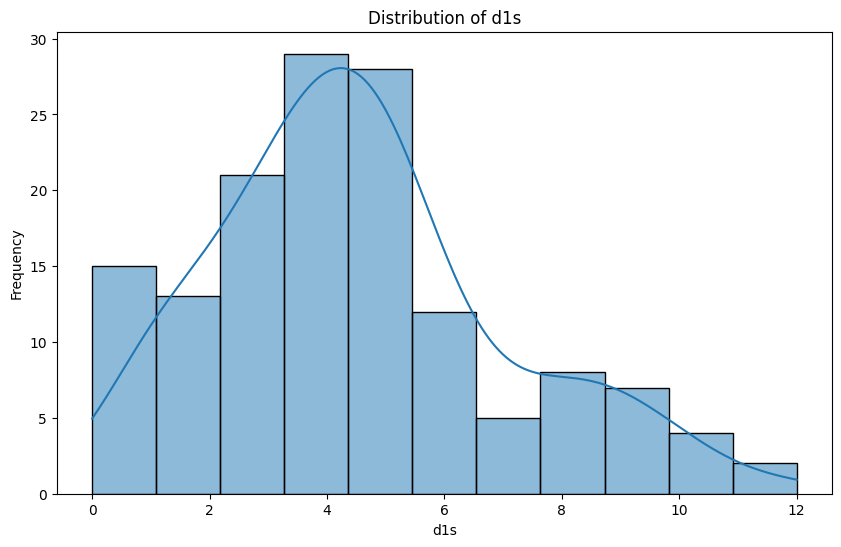


Analysis for column: d2a
Descriptive Statistics:
count    144.000000
mean     156.486111
std       15.957104
min      129.000000
25%      141.750000
50%      159.000000
75%      169.000000
max      195.000000
Name: d2a, dtype: float64


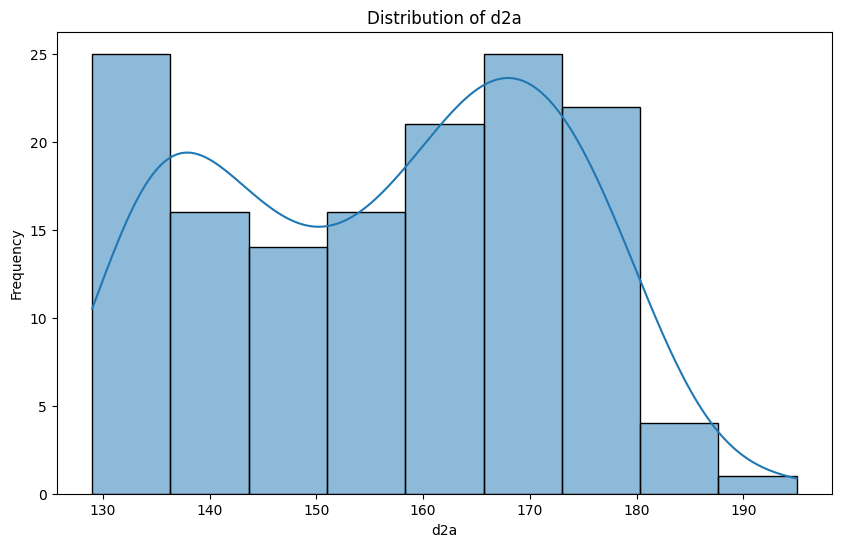


Analysis for column: d2s
Descriptive Statistics:
count    144.000000
mean       5.451389
std        2.894001
min        0.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       13.000000
Name: d2s, dtype: float64


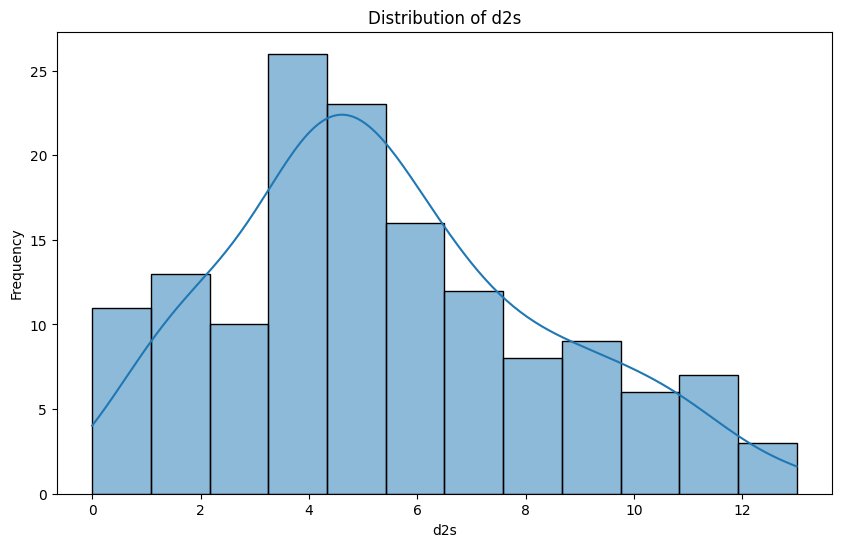


Analysis for column: h1a
Descriptive Statistics:
count    144.000000
mean      67.465278
std       11.621004
min       53.000000
25%       57.000000
50%       63.000000
75%       80.250000
max       86.000000
Name: h1a, dtype: float64


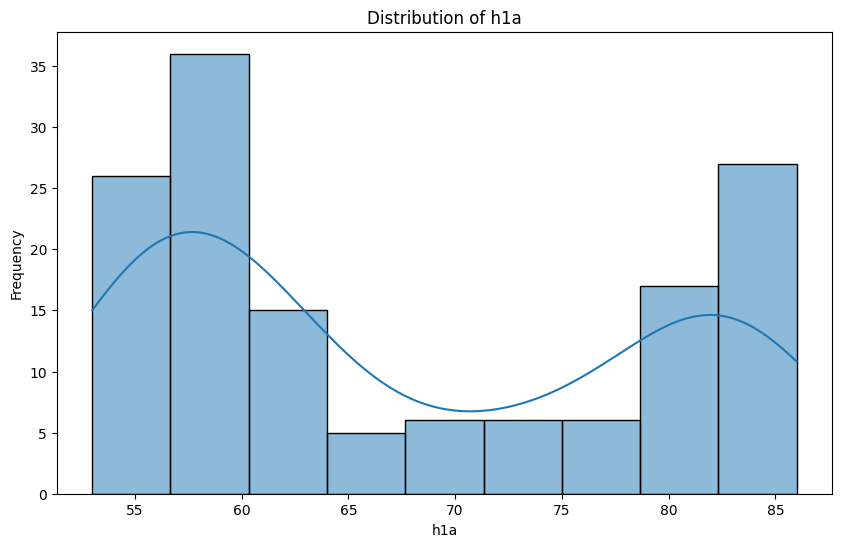


Analysis for column: h1x
Descriptive Statistics:
count    144.000000
mean      67.979167
std       11.551931
min       53.000000
25%       58.000000
50%       64.000000
75%       81.000000
max       86.000000
Name: h1x, dtype: float64


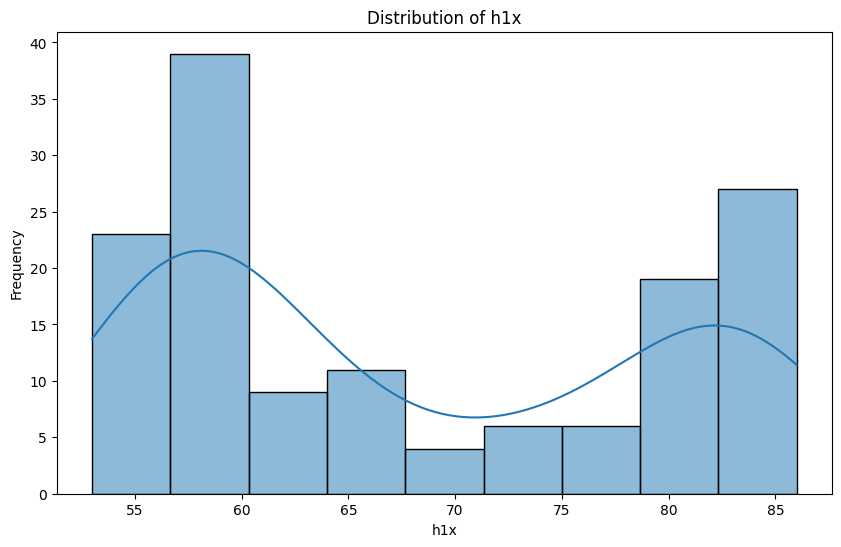


Analysis for column: h1i
Descriptive Statistics:
count    144.000000
mean      66.958333
std       11.654031
min       52.000000
25%       57.000000
50%       62.000000
75%       80.000000
max       86.000000
Name: h1i, dtype: float64


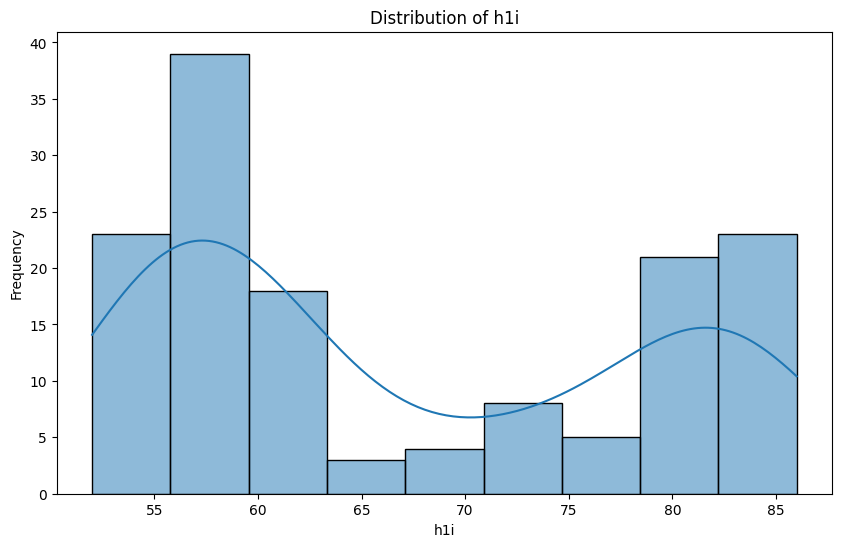


Analysis for column: t1a
Descriptive Statistics:
count    144.000000
mean      -2.351389
std        1.465595
min       -4.750000
25%       -4.050000
50%       -1.750000
75%       -1.250000
max       -0.250000
Name: t1a, dtype: float64


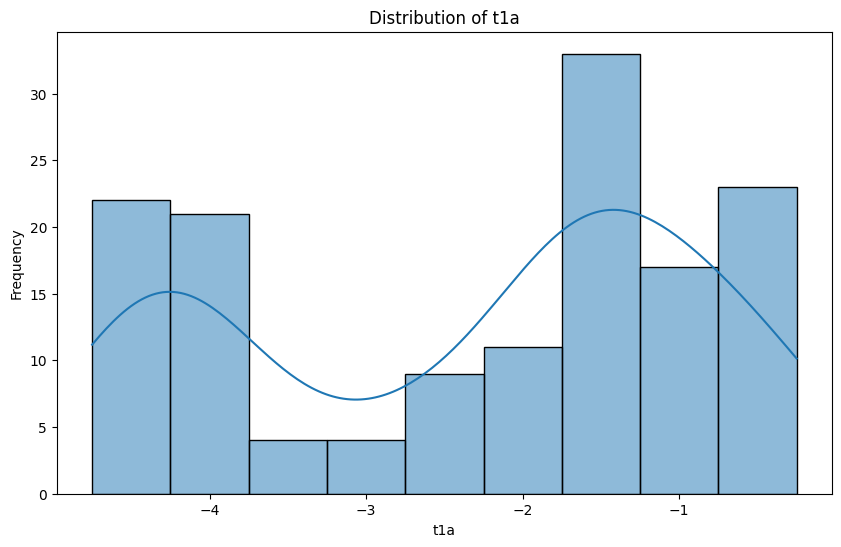


Analysis for column: t1x
Descriptive Statistics:
count    144.000000
mean      -2.290278
std        1.476261
min       -4.650000
25%       -4.050000
50%       -1.700000
75%       -1.150000
max       -0.250000
Name: t1x, dtype: float64


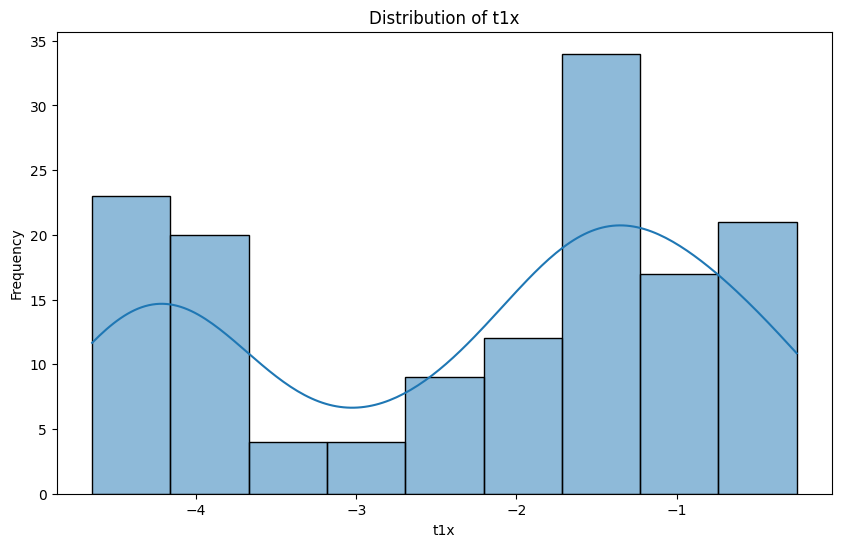


Analysis for column: t1i
Descriptive Statistics:
count    144.000000
mean      -2.420139
std        1.456698
min       -4.750000
25%       -4.050000
50%       -1.900000
75%       -1.250000
max       -0.350000
Name: t1i, dtype: float64


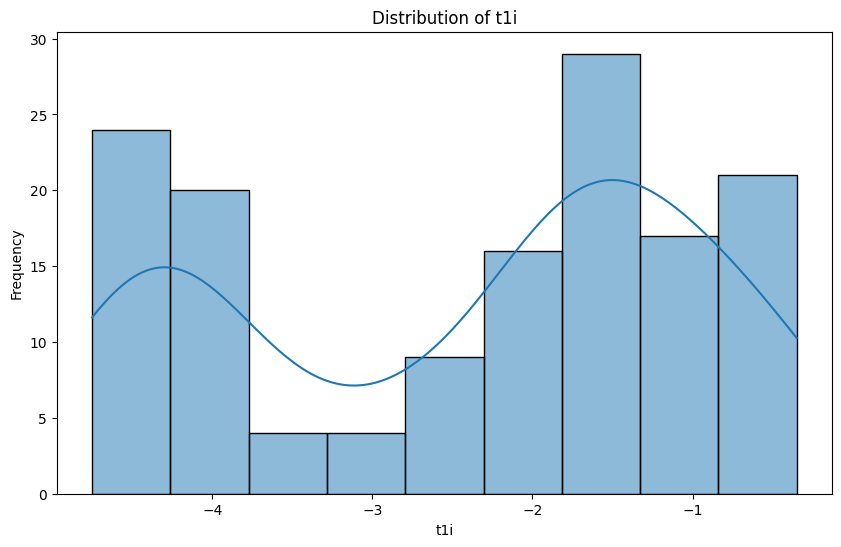


Analysis for column: b1a
Descriptive Statistics:
count     144.000000
mean     1025.493056
std         3.877488
min      1018.000000
25%      1023.000000
50%      1025.000000
75%      1029.000000
max      1031.000000
Name: b1a, dtype: float64


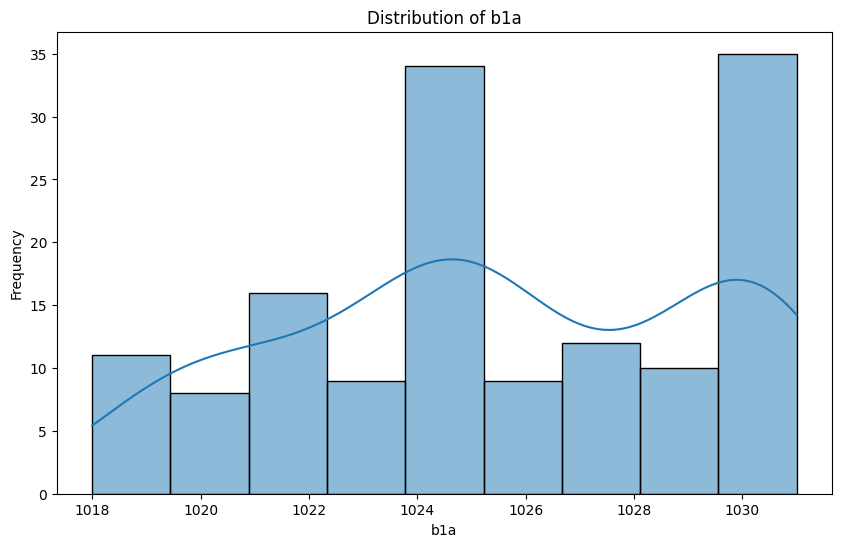


Analysis for column: b1x
Descriptive Statistics:
count     144.000000
mean     1025.840278
std         3.916369
min      1019.000000
25%      1023.000000
50%      1025.000000
75%      1030.000000
max      1032.000000
Name: b1x, dtype: float64


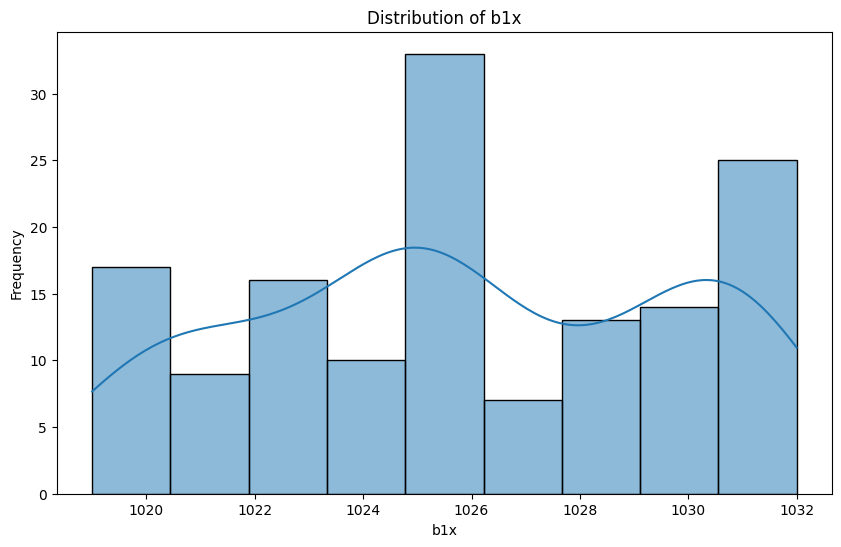


Analysis for column: b1i
Descriptive Statistics:
count     144.000000
mean     1025.062500
std         3.890492
min      1018.000000
25%      1022.000000
50%      1024.000000
75%      1029.000000
max      1031.000000
Name: b1i, dtype: float64


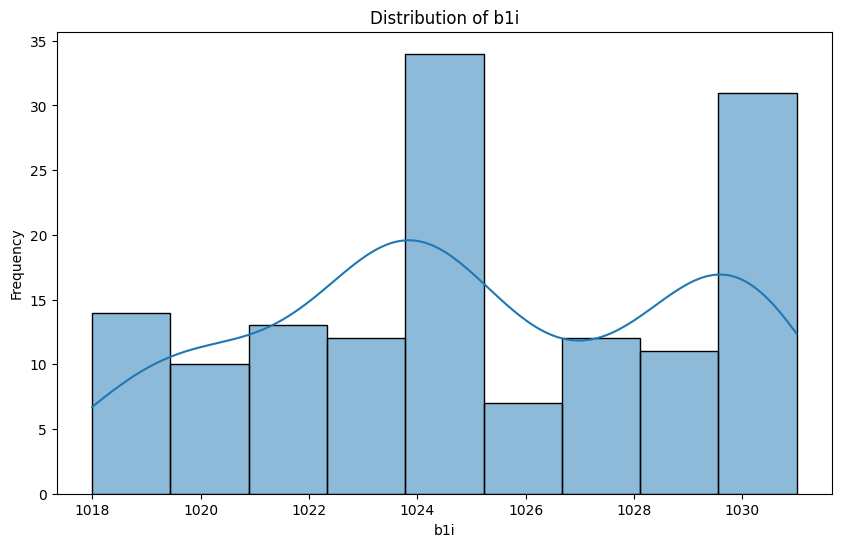


Analysis for column: p1a
Descriptive Statistics:
count    144.000000
mean       6.185000
std        2.636664
min        0.498520
25%        3.923515
50%        7.215545
75%        8.228825
max       10.209550
Name: p1a, dtype: float64


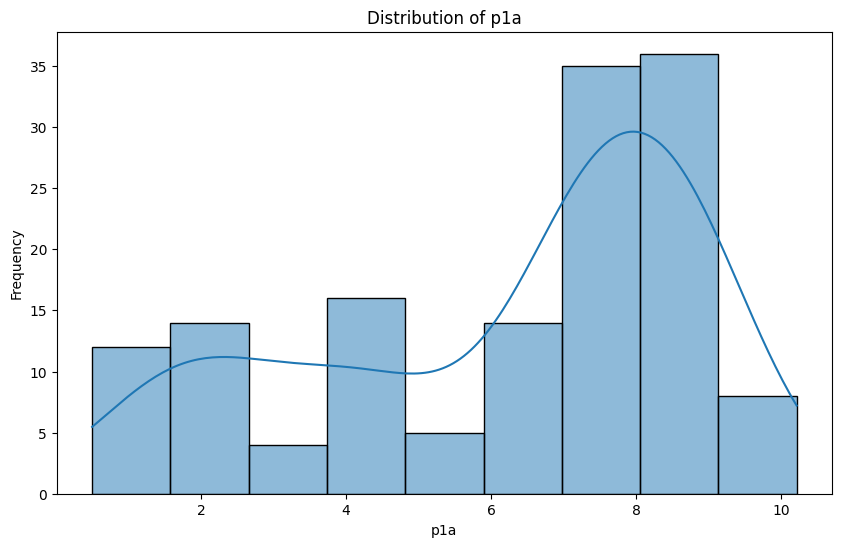


Analysis for column: p1x
Descriptive Statistics:
count    144.000000
mean       7.857886
std        3.574254
min        0.732350
25%        4.446200
50%        9.008275
75%       10.704725
max       14.716600
Name: p1x, dtype: float64


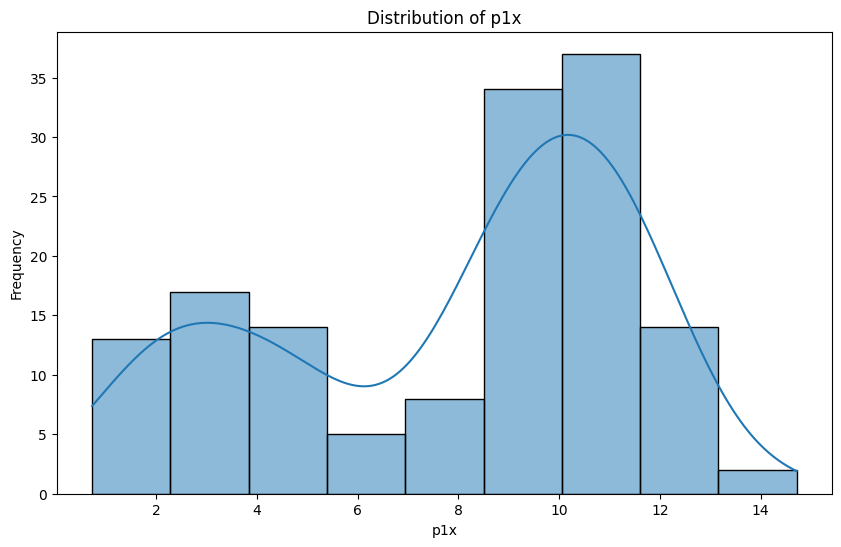


Analysis for column: p1i
Descriptive Statistics:
count    144.000000
mean       4.383475
std        1.802474
min        0.228000
25%        3.460425
50%        4.675450
75%        5.730000
max        8.205900
Name: p1i, dtype: float64


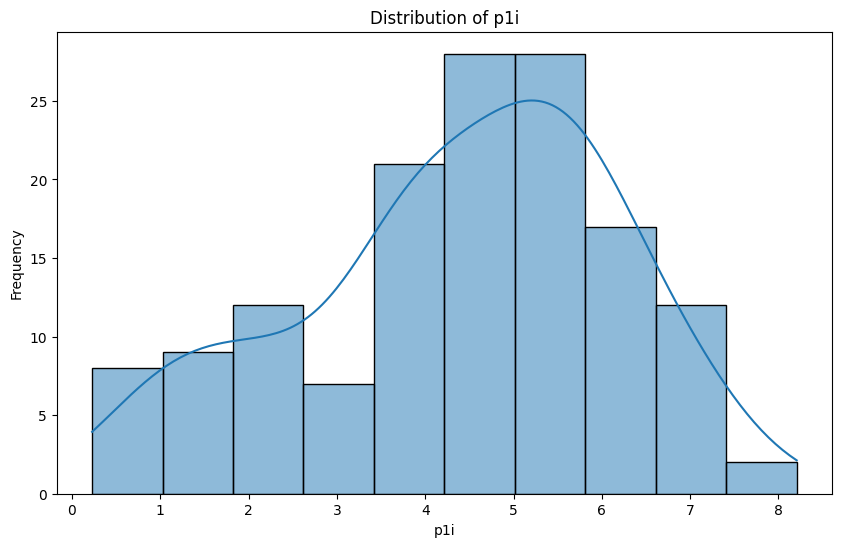


Analysis for column: p1s
Descriptive Statistics:
count    144.000000
mean       0.656135
std        0.430722
min        0.050440
25%        0.253323
50%        0.632730
75%        0.960562
max        1.673530
Name: p1s, dtype: float64


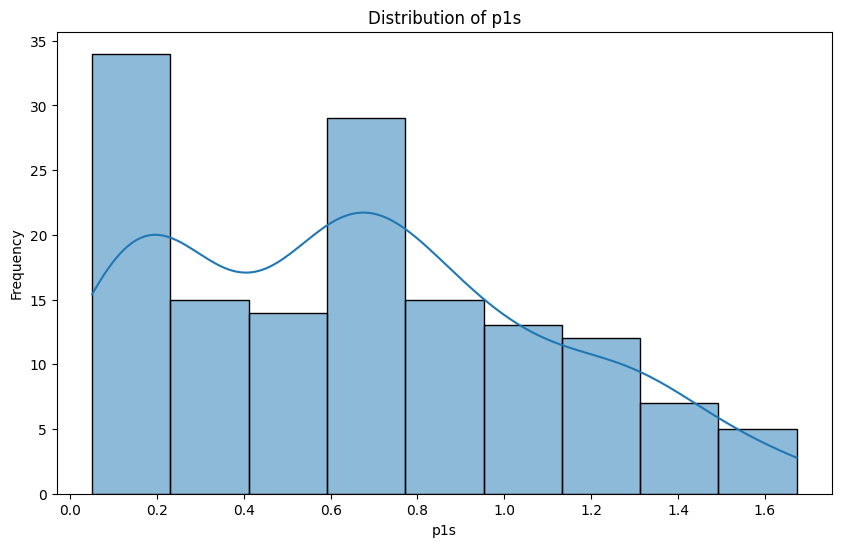


Analysis for column: tia
Descriptive Statistics:
count    144.000000
mean      37.180556
std        3.053492
min       32.000000
25%       35.000000
50%       36.000000
75%       39.250000
max       42.000000
Name: tia, dtype: float64


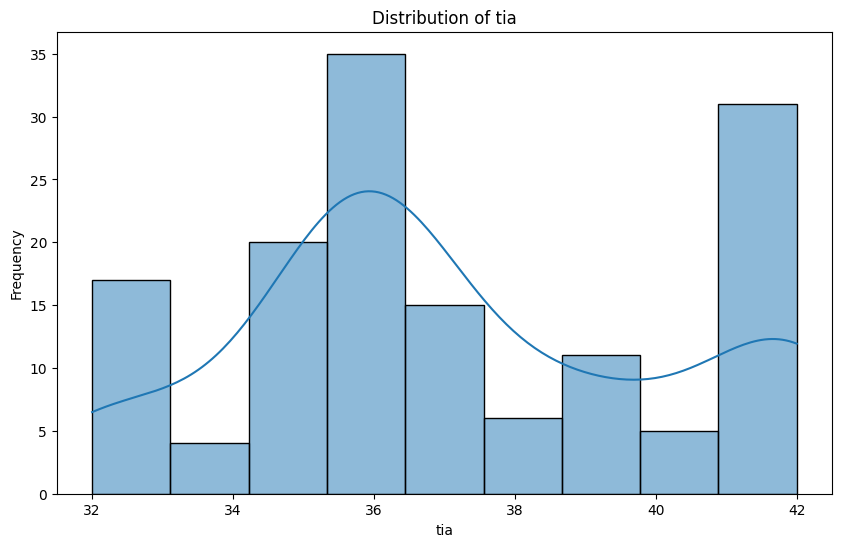


Analysis for column: tix
Descriptive Statistics:
count    144.000000
mean      37.263889
std        3.035884
min       32.000000
25%       35.000000
50%       36.000000
75%       40.000000
max       42.000000
Name: tix, dtype: float64


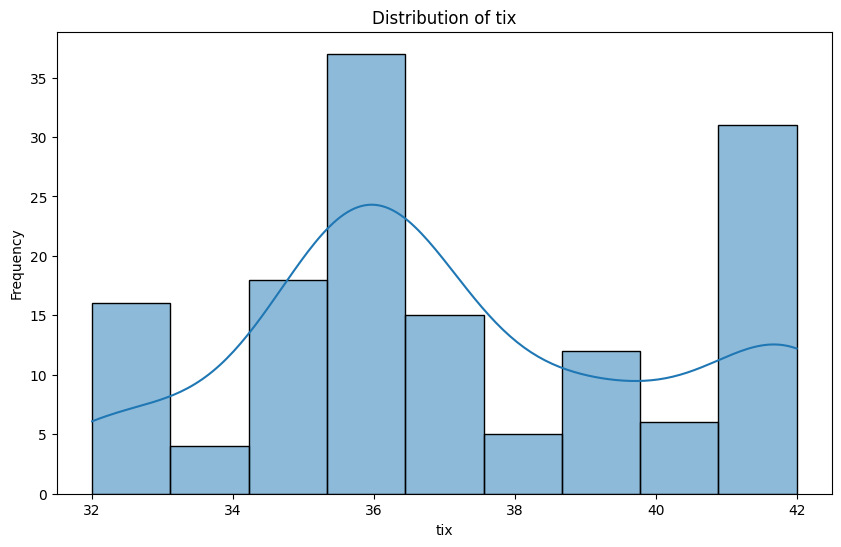


Analysis for column: tii
Descriptive Statistics:
count    144.000000
mean      37.131944
std        3.024946
min       32.000000
25%       35.000000
50%       36.000000
75%       39.000000
max       42.000000
Name: tii, dtype: float64


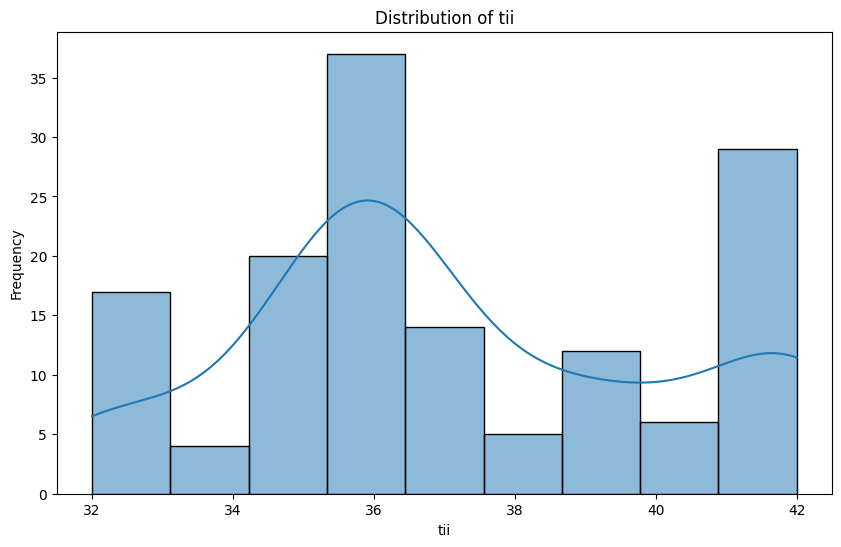


Analysis for column: vxa
Descriptive Statistics:
count    144.000000
mean     130.965278
std        6.693503
min      124.000000
25%      125.000000
50%      127.000000
75%      138.000000
max      140.000000
Name: vxa, dtype: float64


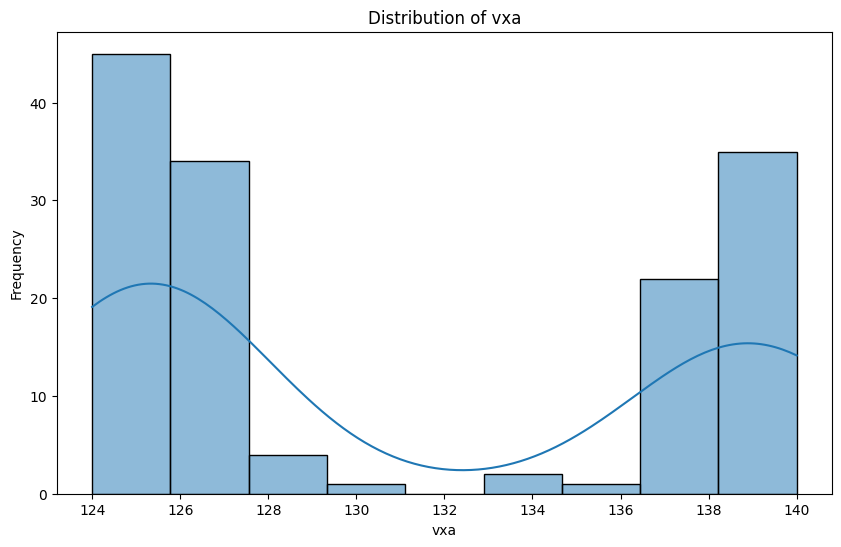


Analysis for column: vxx
Descriptive Statistics:
count    144.000000
mean     131.416667
std        7.038853
min      124.000000
25%      125.000000
50%      127.000000
75%      140.000000
max      142.000000
Name: vxx, dtype: float64


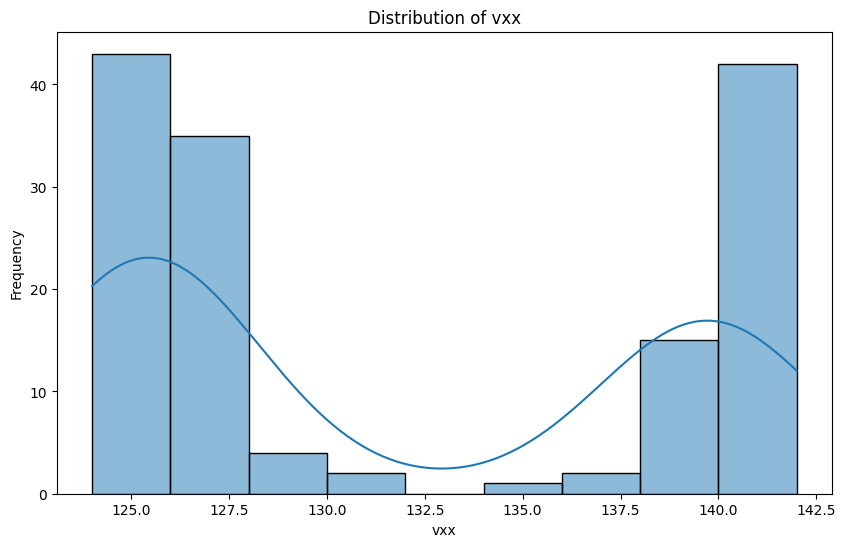


Analysis for column: vxi
Descriptive Statistics:
count    144.000000
mean     130.576389
std        6.464080
min      124.000000
25%      125.000000
50%      126.500000
75%      138.000000
max      140.000000
Name: vxi, dtype: float64


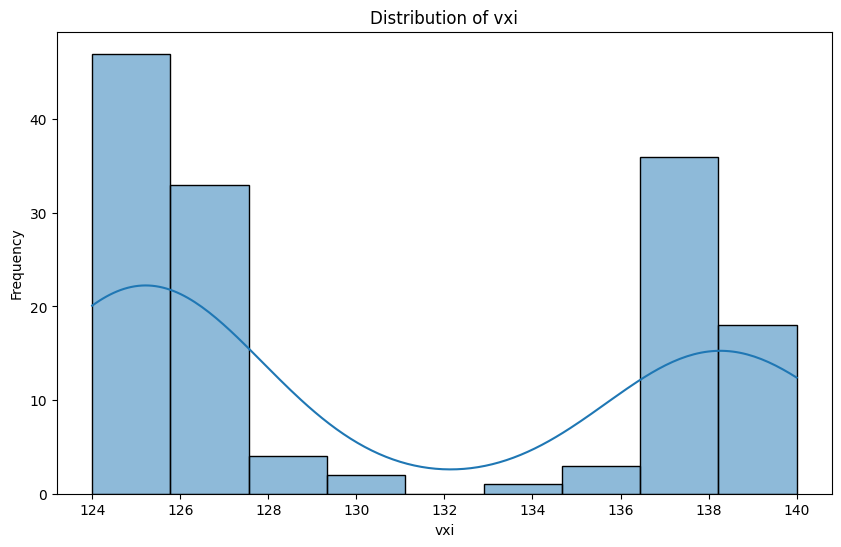


Analysis for column: bla
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bla, dtype: float64


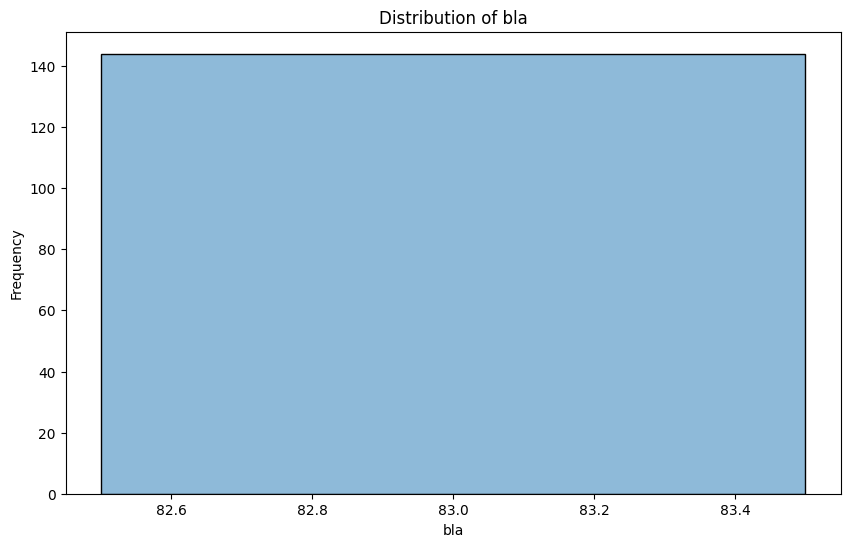


Analysis for column: blx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: blx, dtype: float64


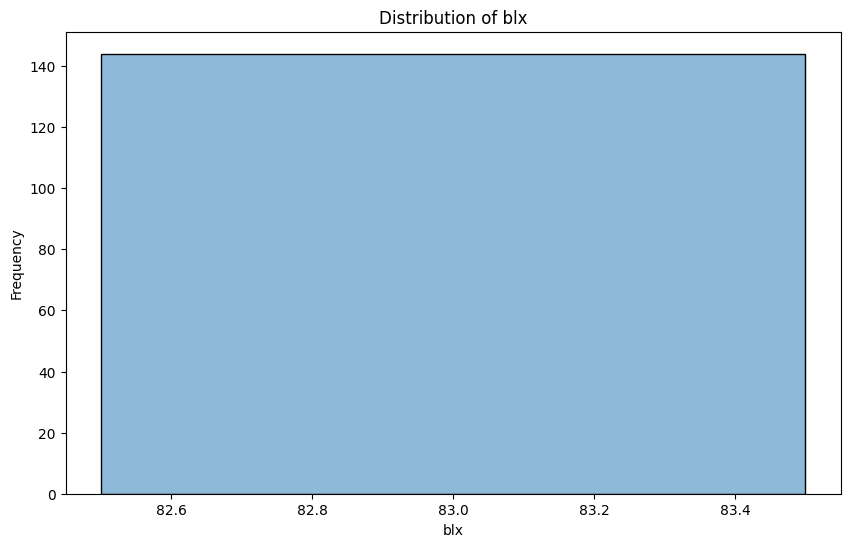


Analysis for column: bli
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bli, dtype: float64


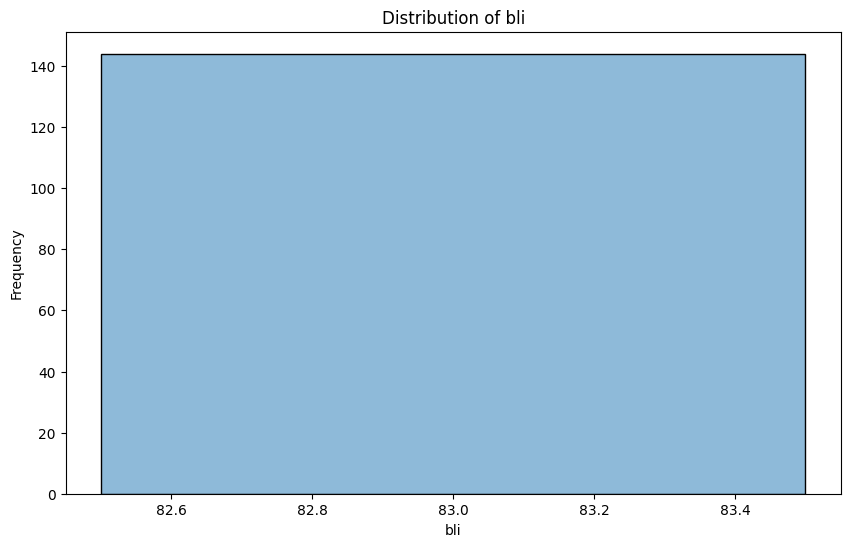


Analysis for column: bra
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bra, dtype: float64


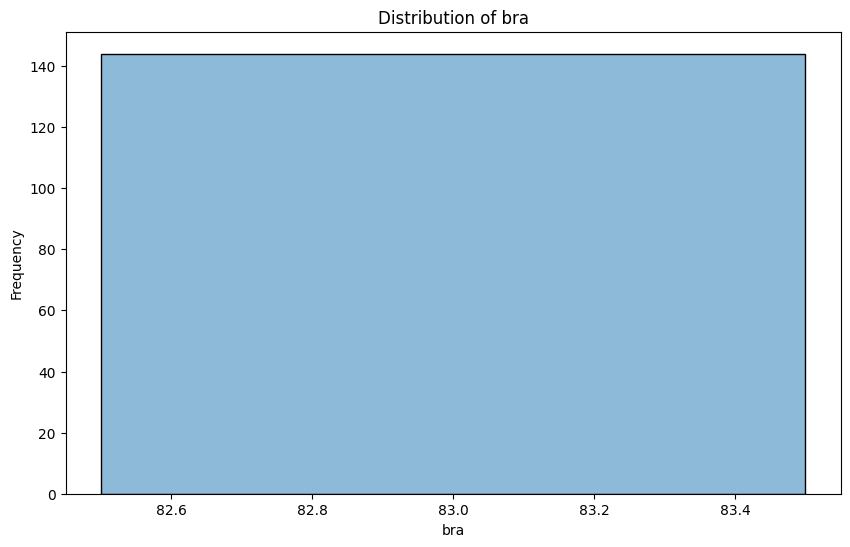


Analysis for column: brx
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: brx, dtype: float64


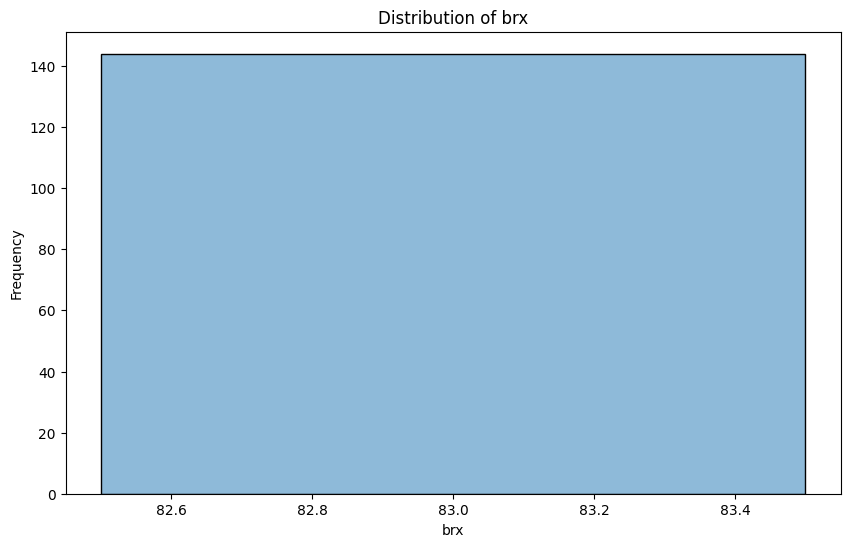


Analysis for column: bri
Descriptive Statistics:
count    144.0
mean      83.0
std        0.0
min       83.0
25%       83.0
50%       83.0
75%       83.0
max       83.0
Name: bri, dtype: float64


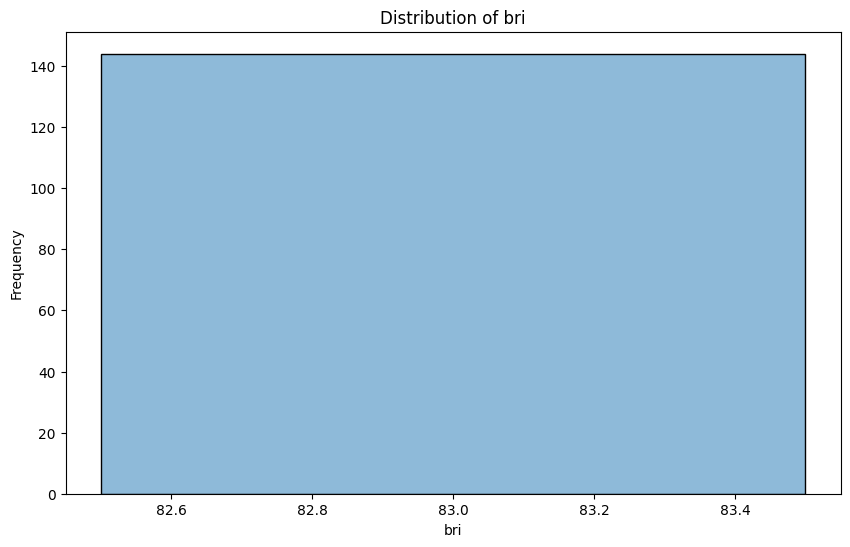

In [15]:
# Perform Statistical data analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        print("\nAnalysis for column:", column)
        
        # Descriptive statistics
        print("Descriptive Statistics:")
        print(df[column].describe())
        
        # Data visualization
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()  

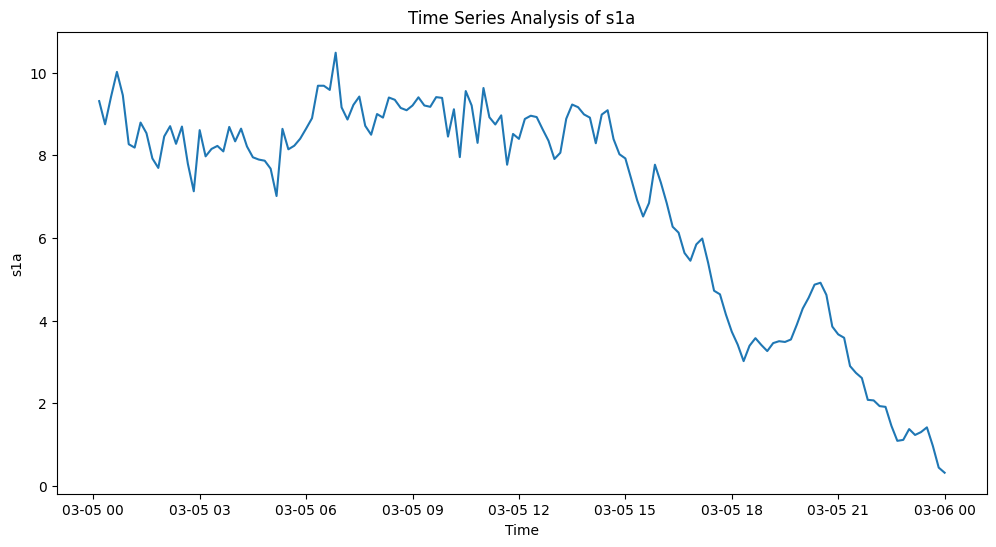

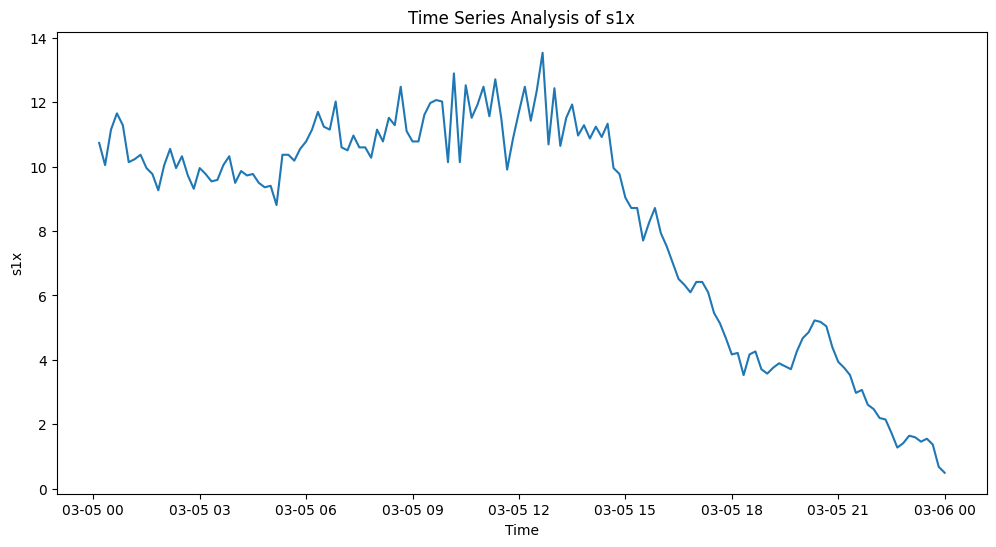

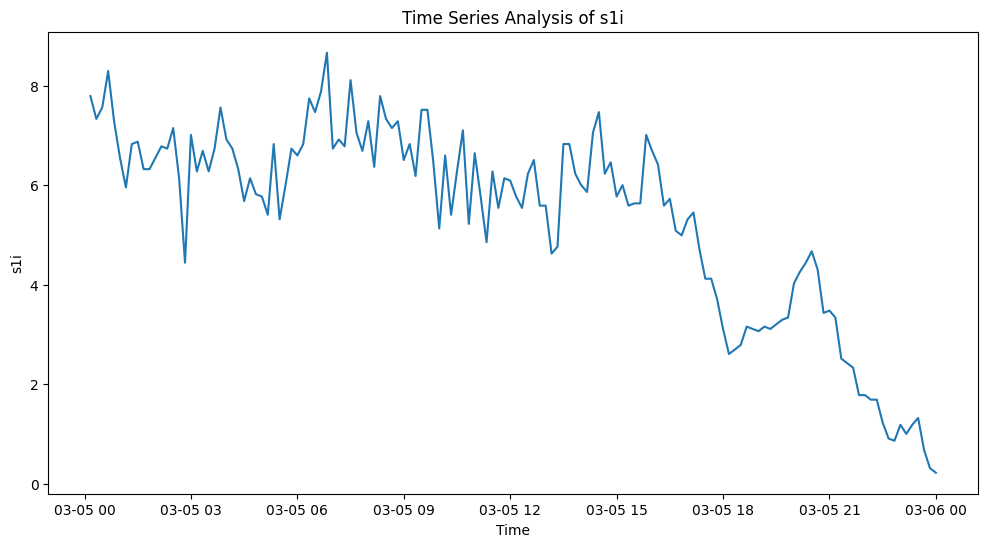

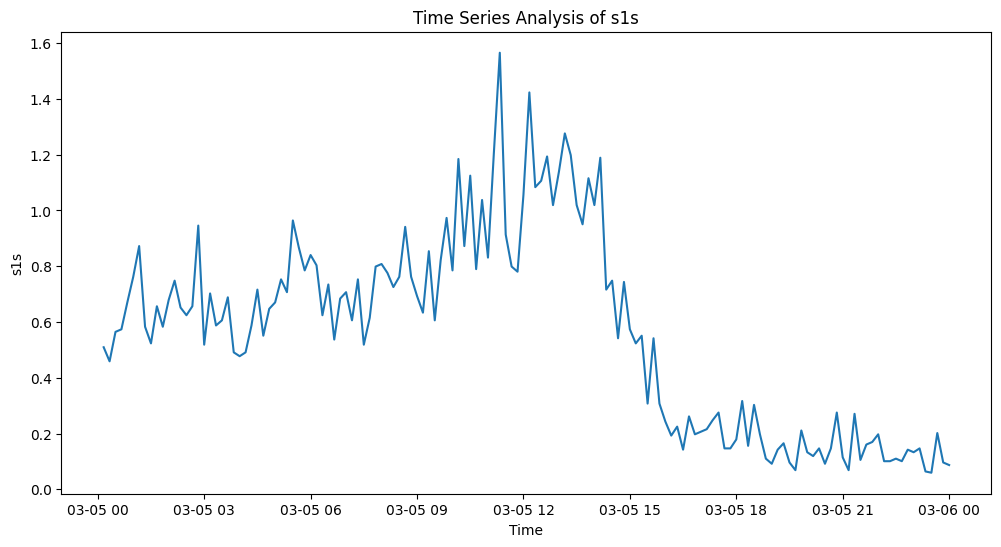

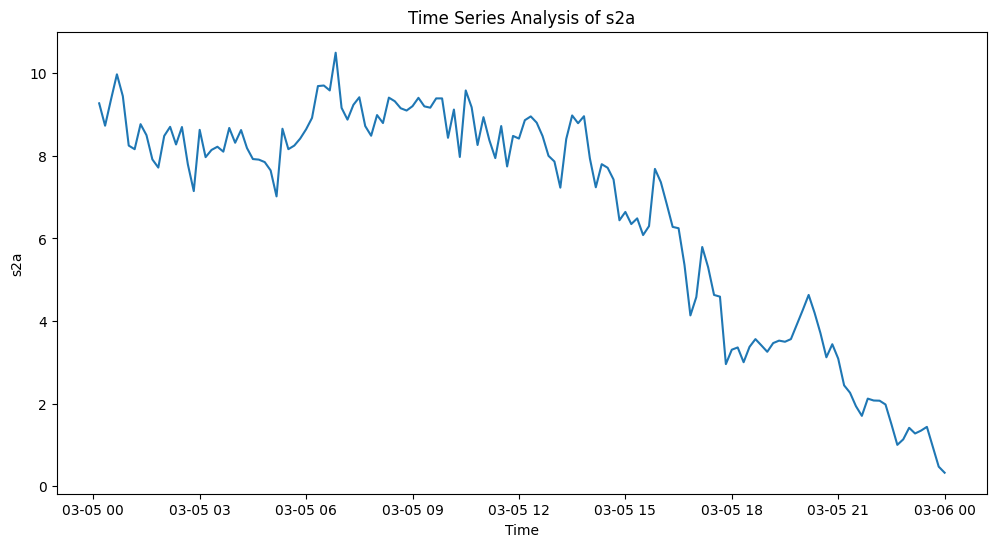

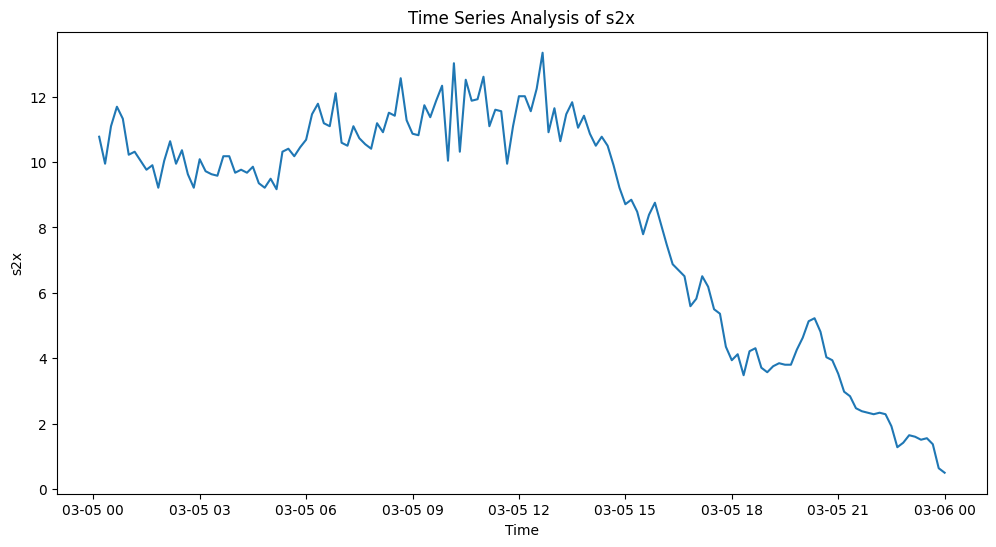

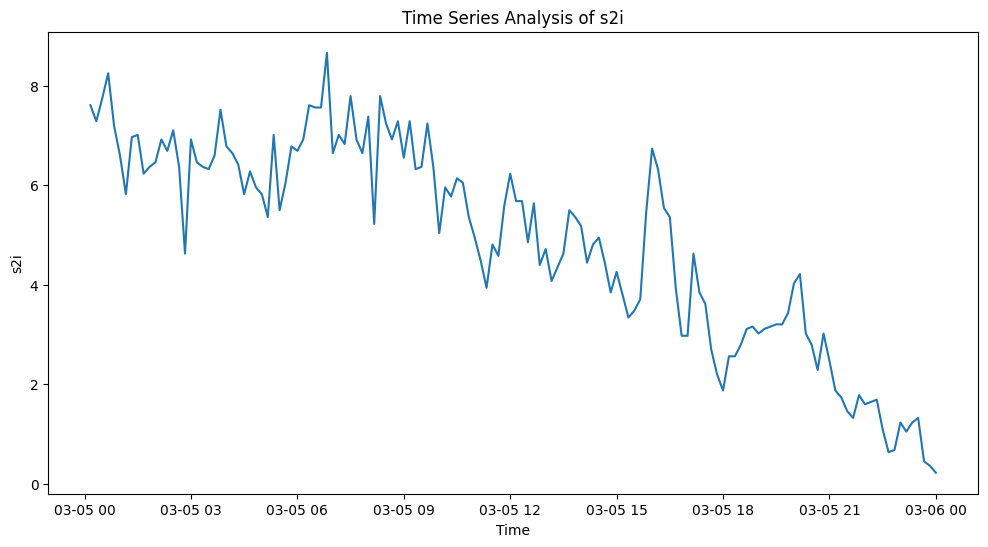

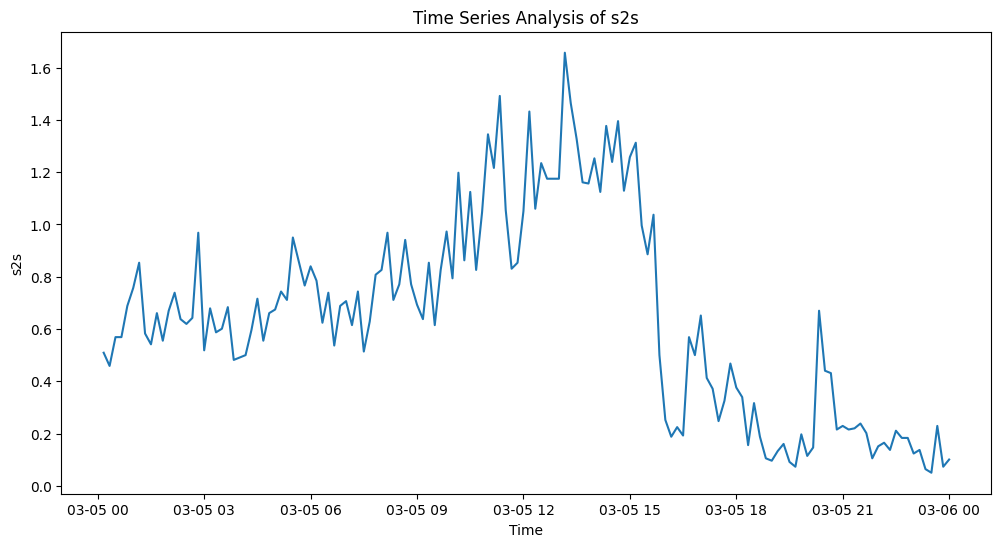

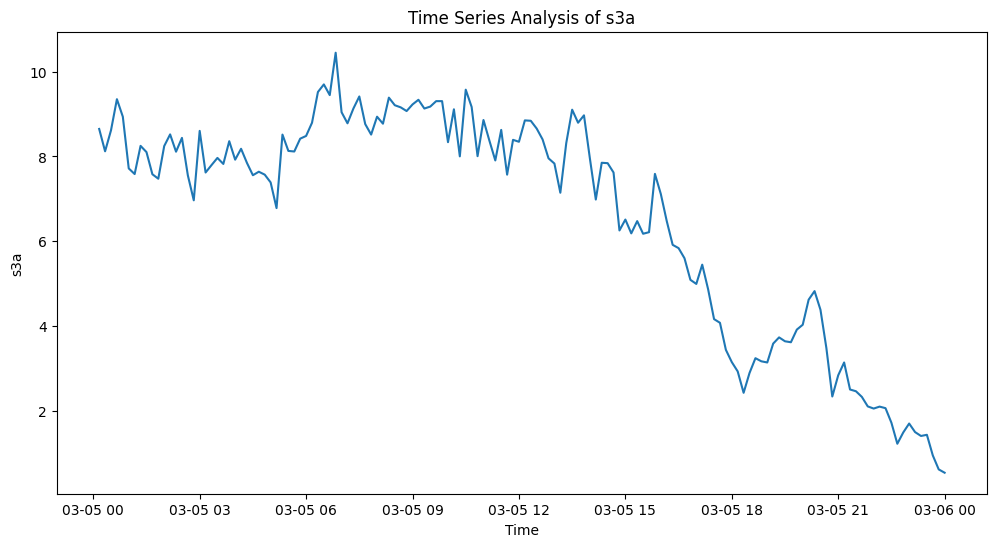

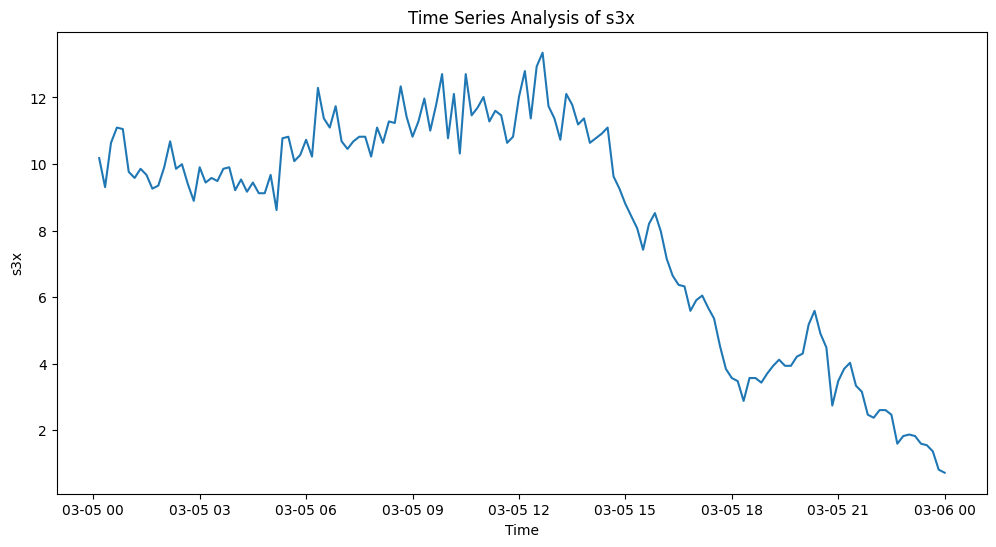

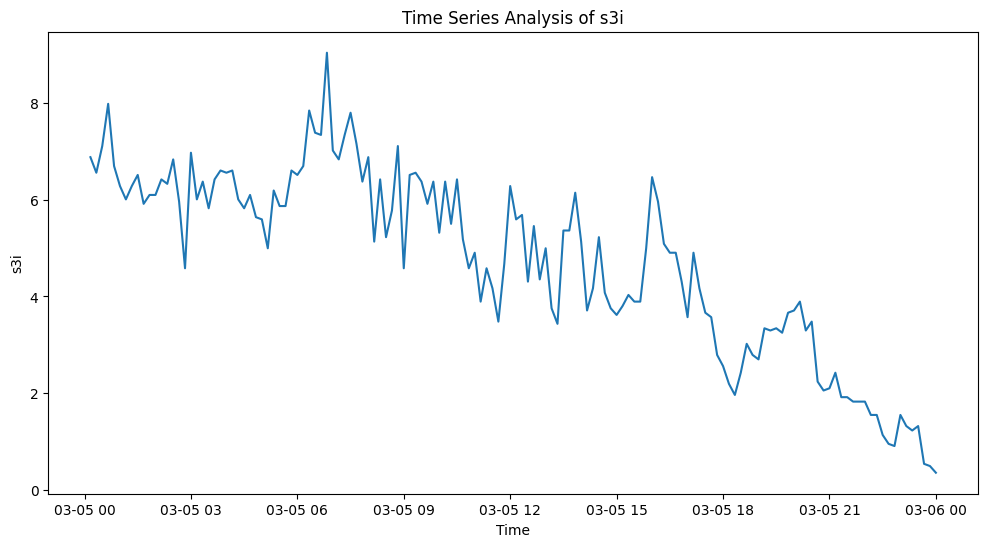

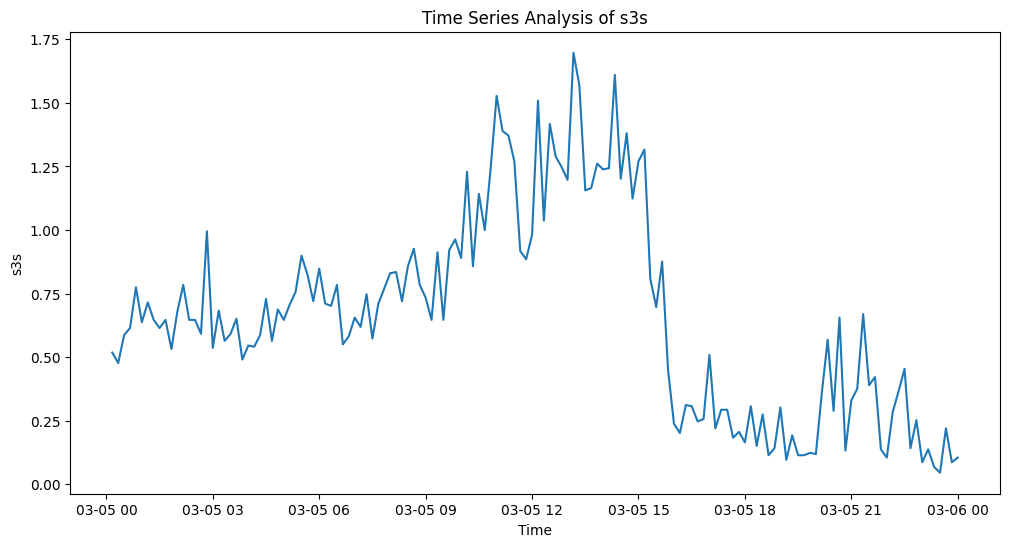

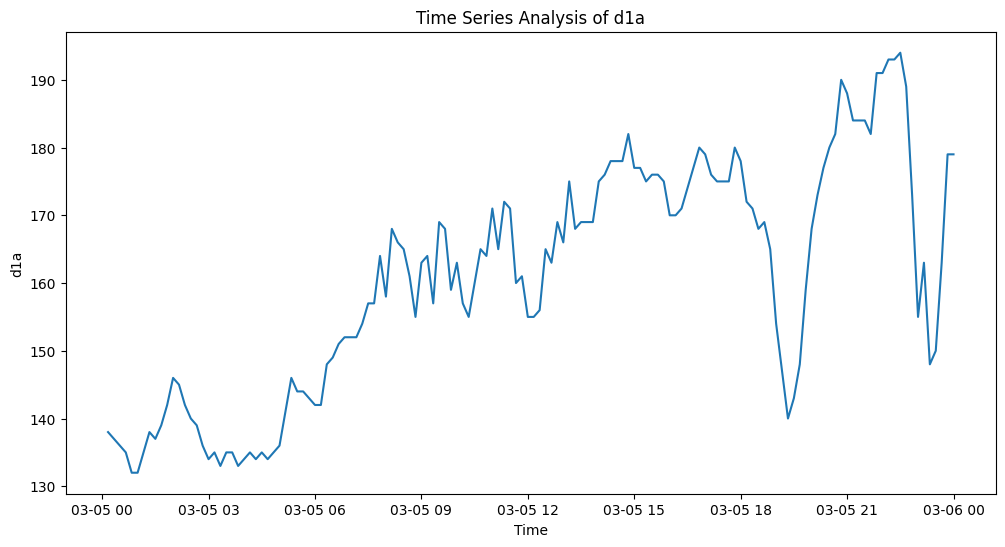

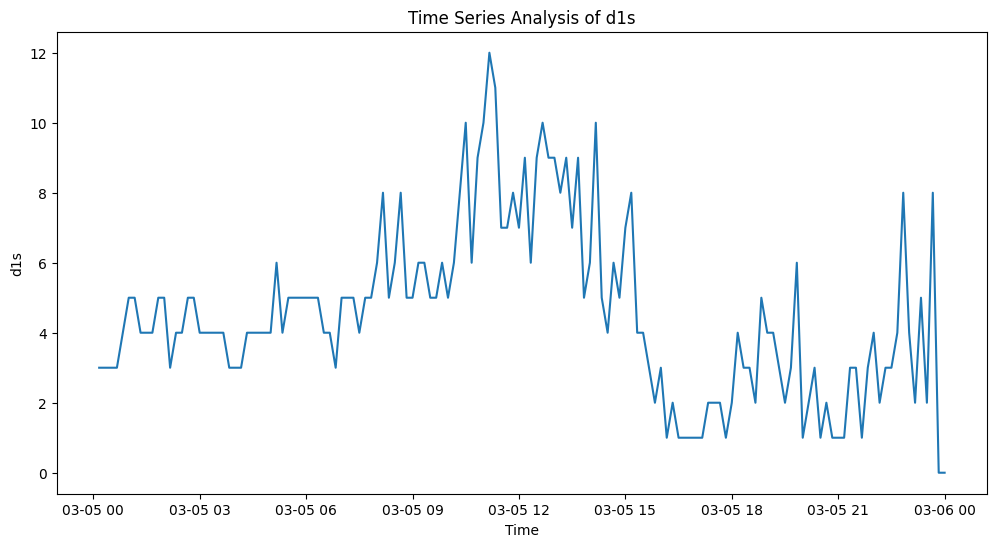

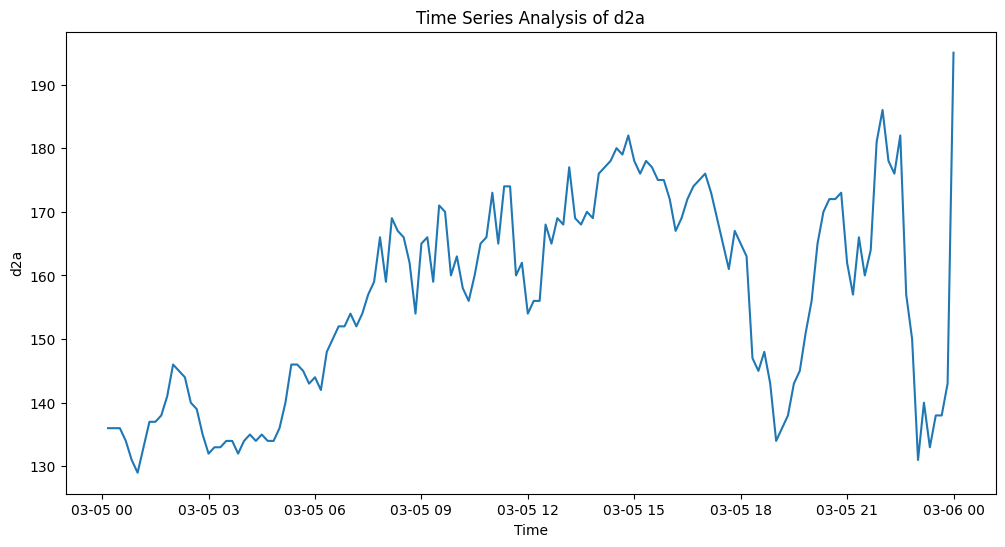

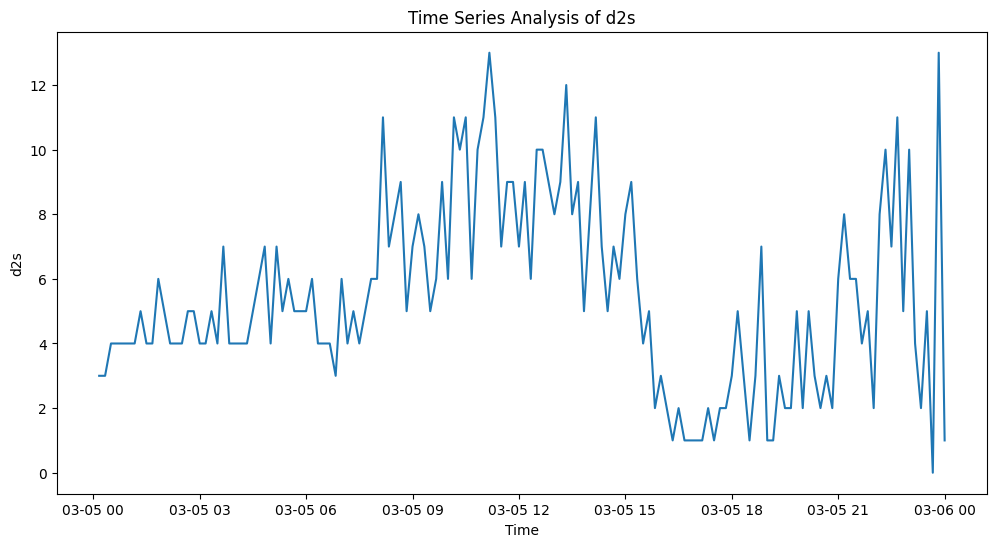

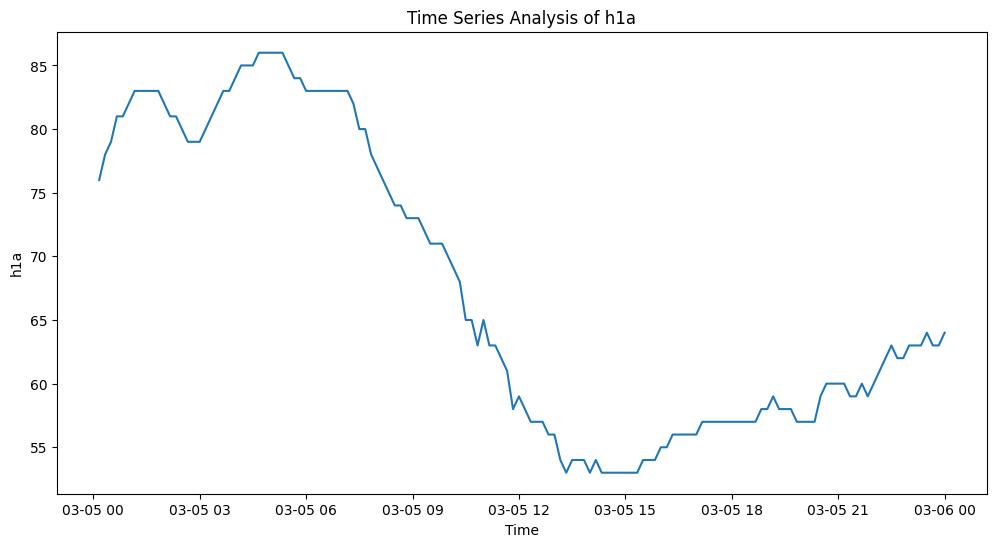

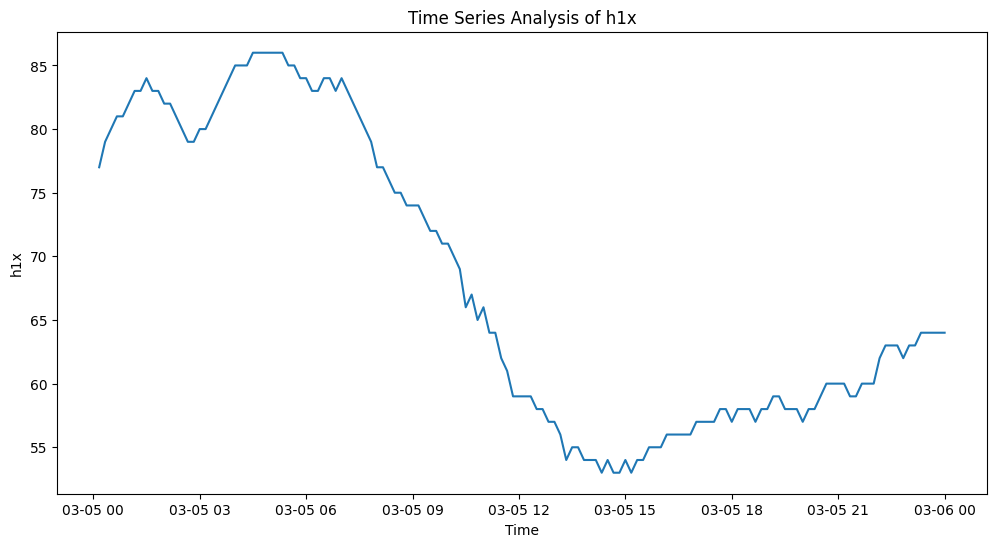

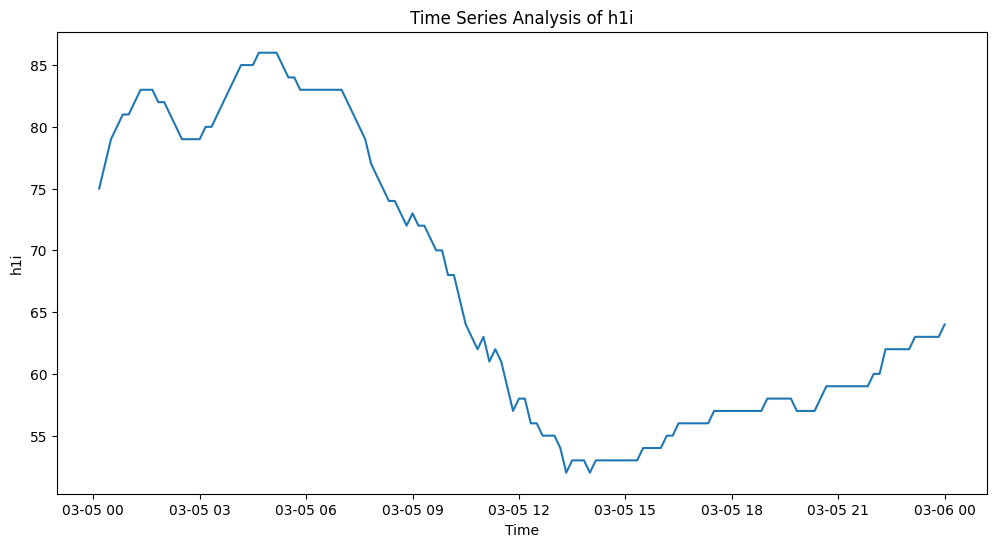

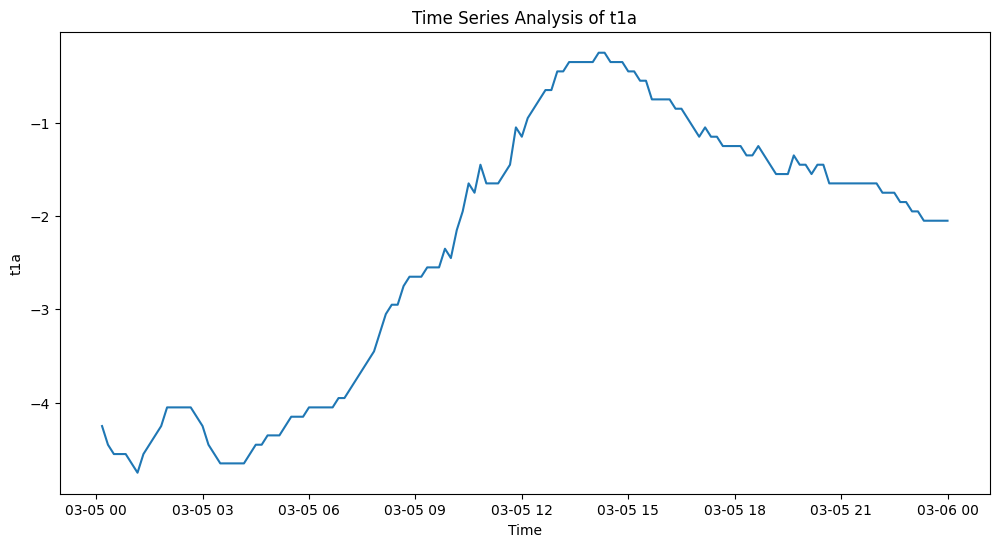

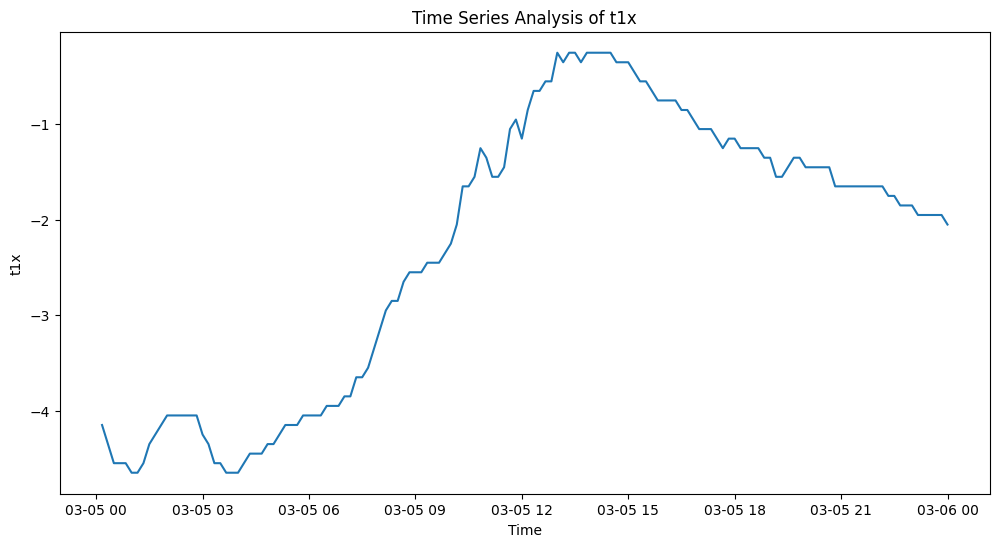

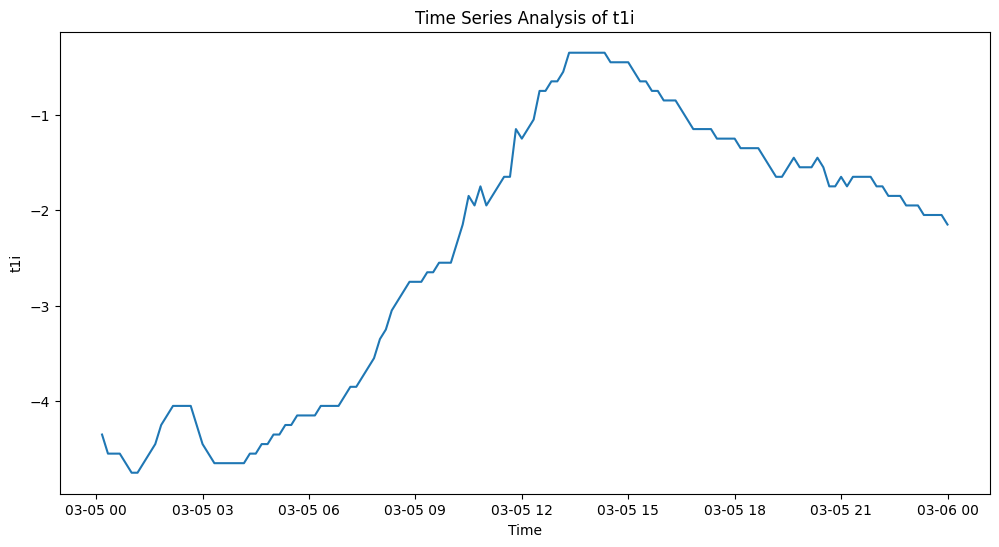

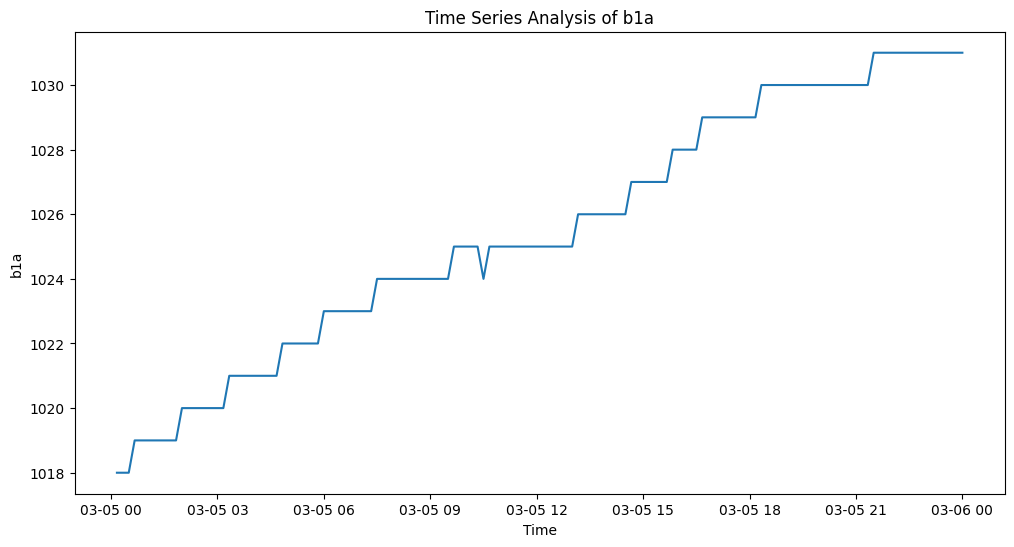

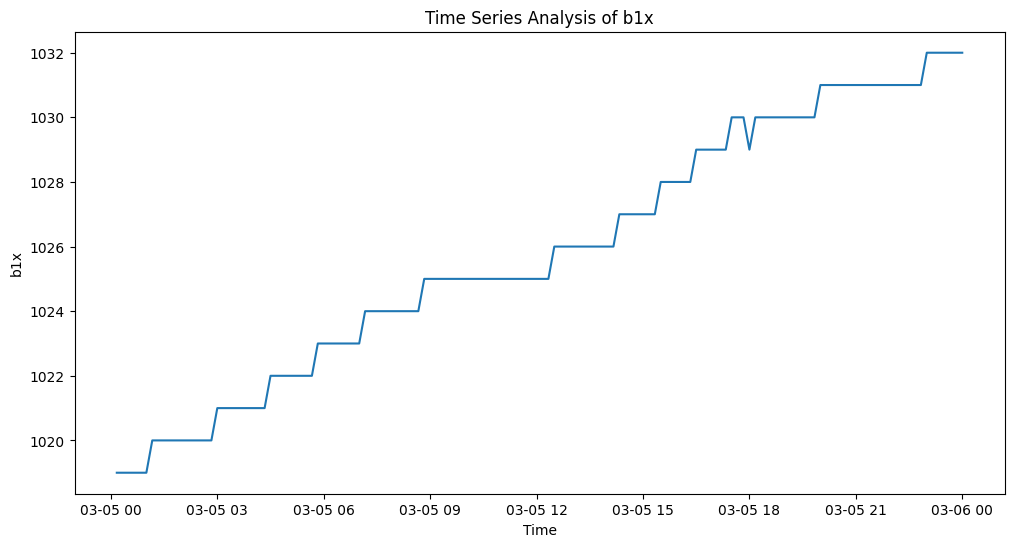

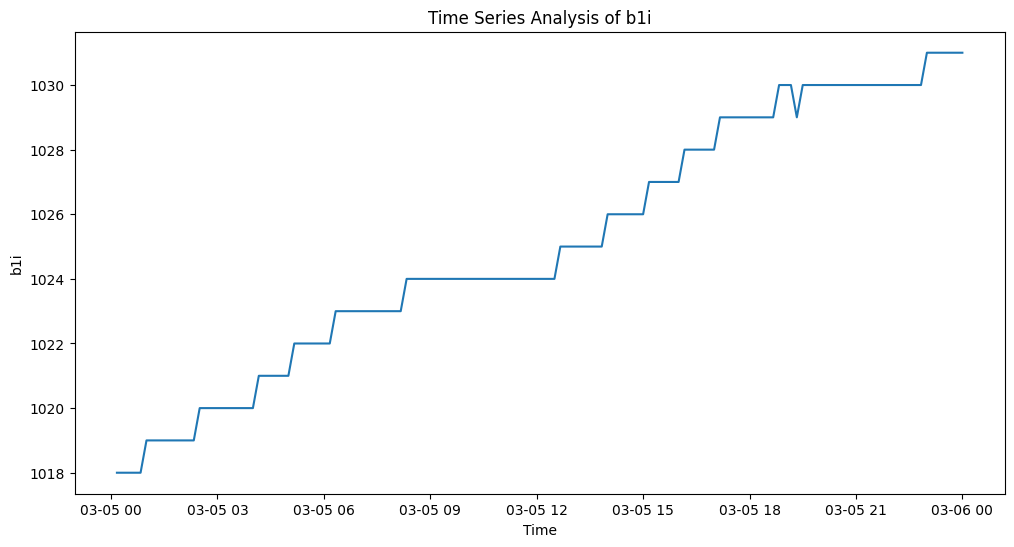

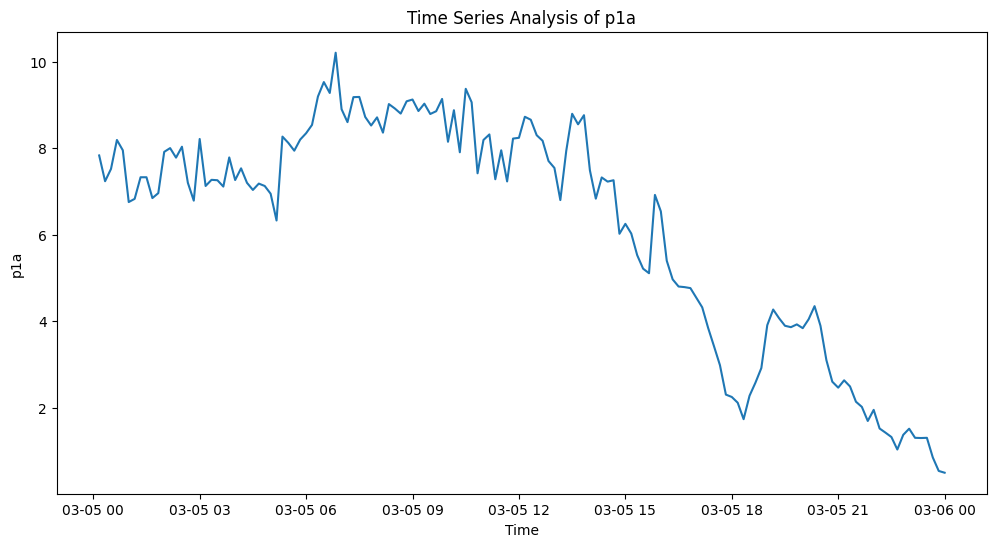

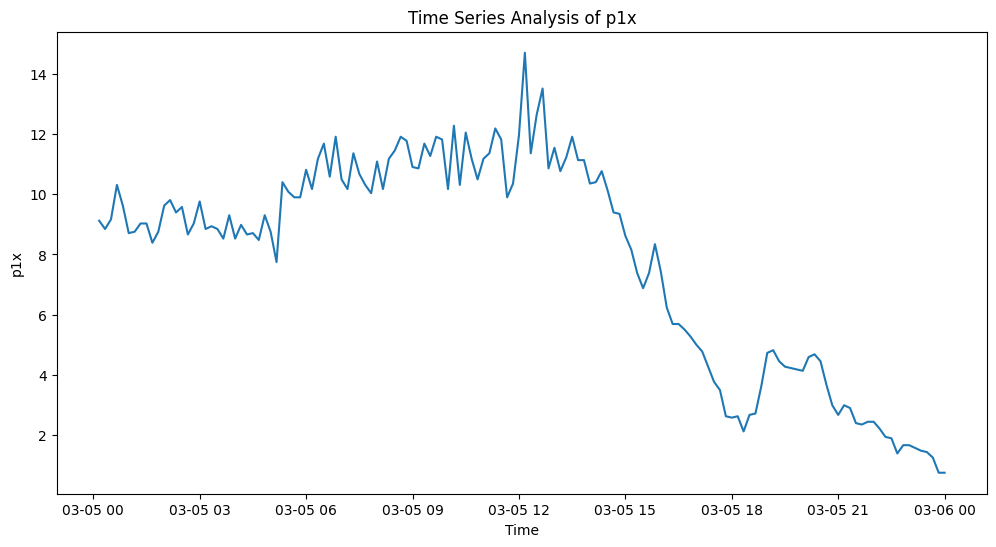

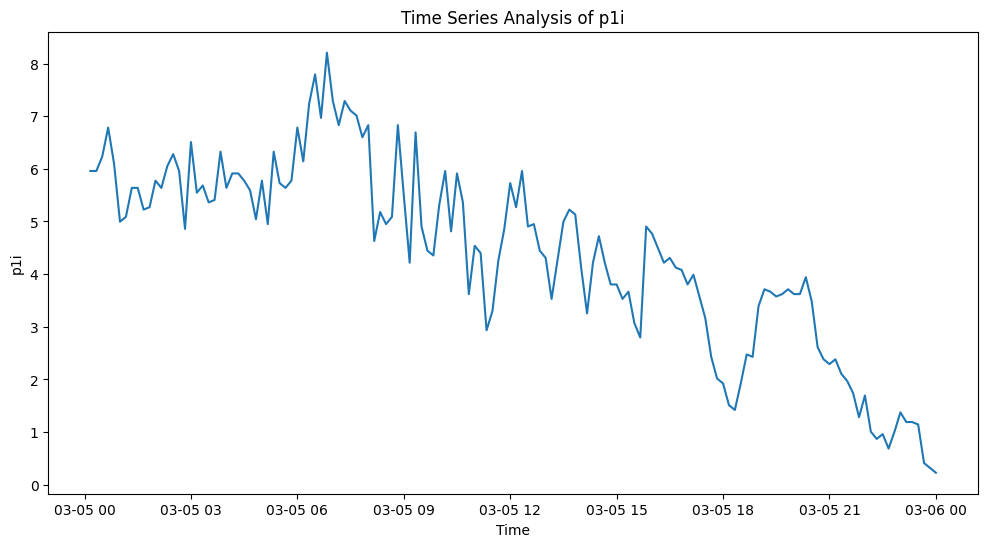

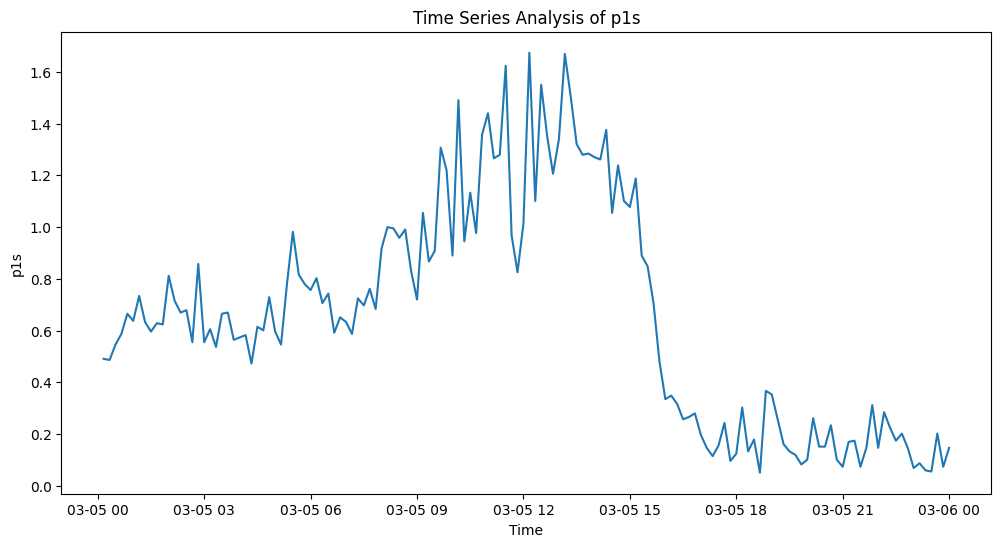

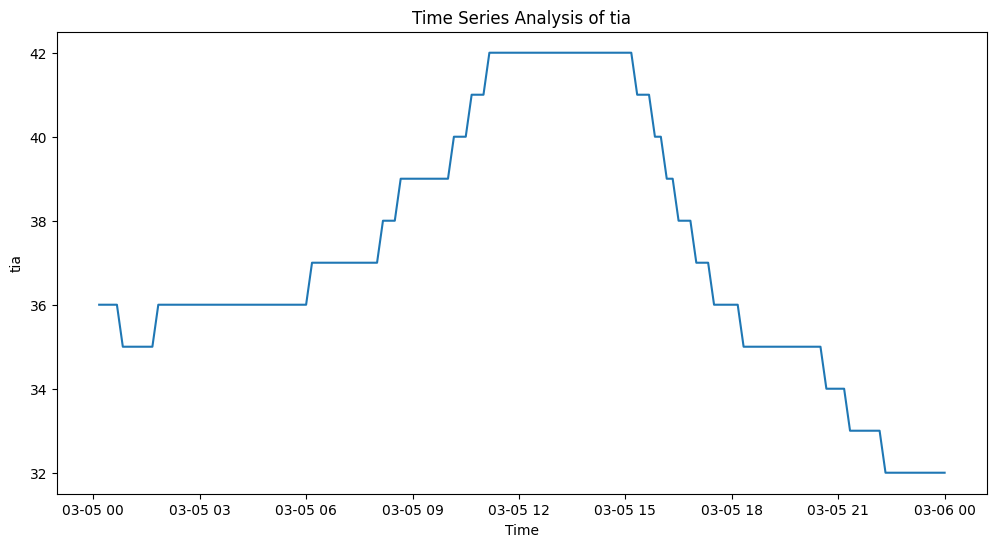

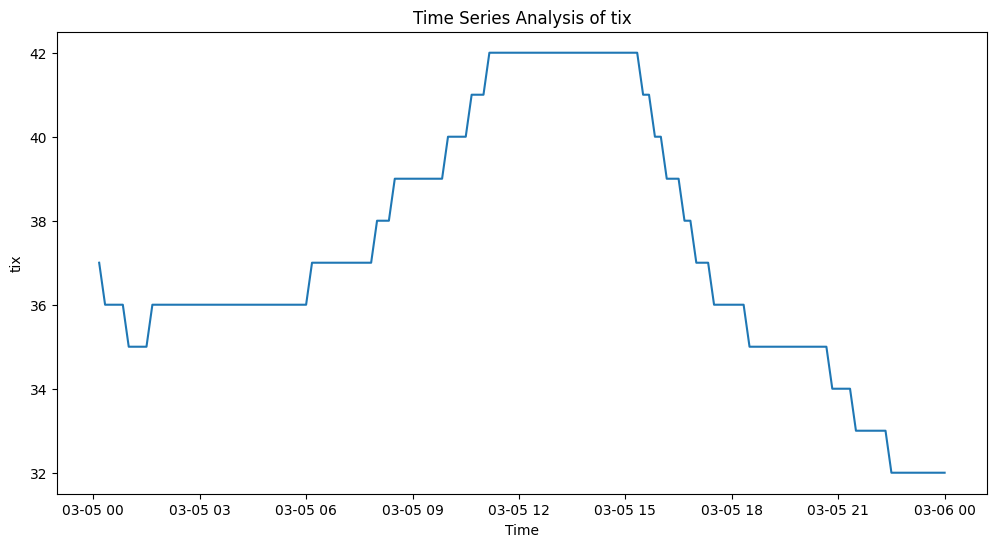

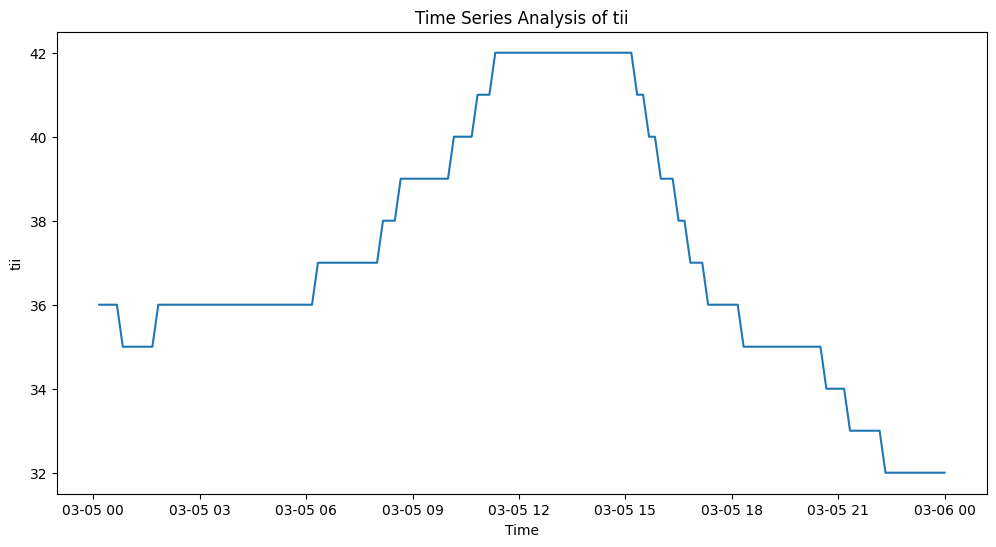

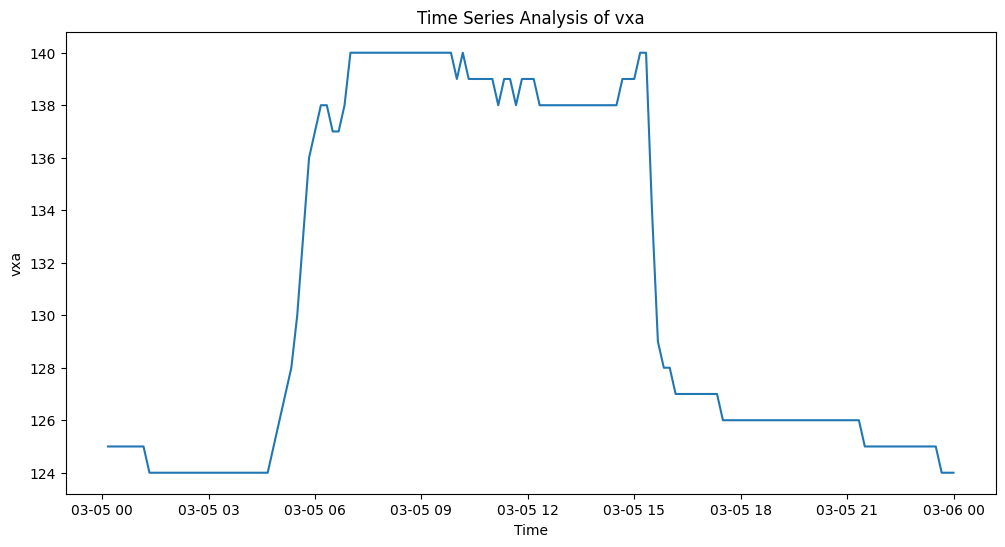

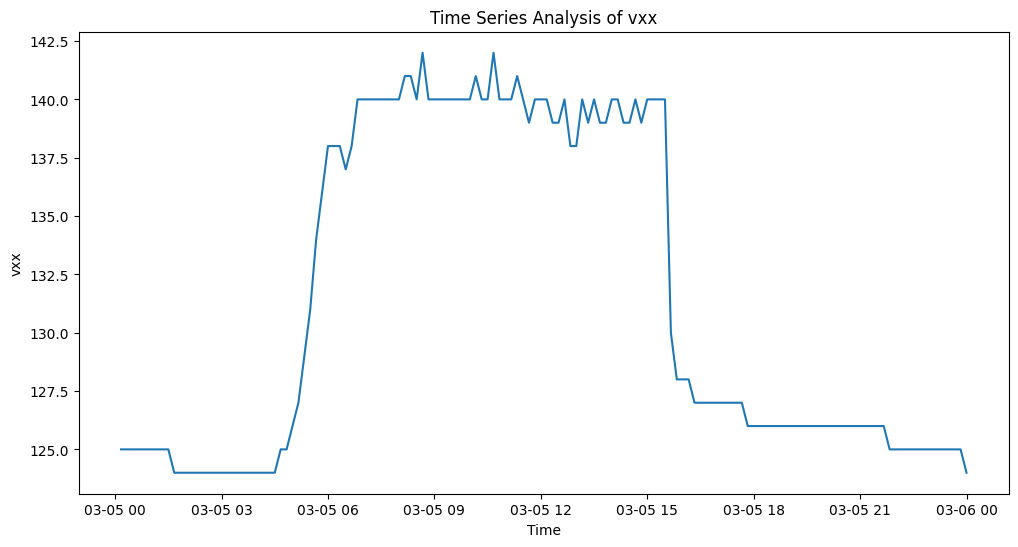

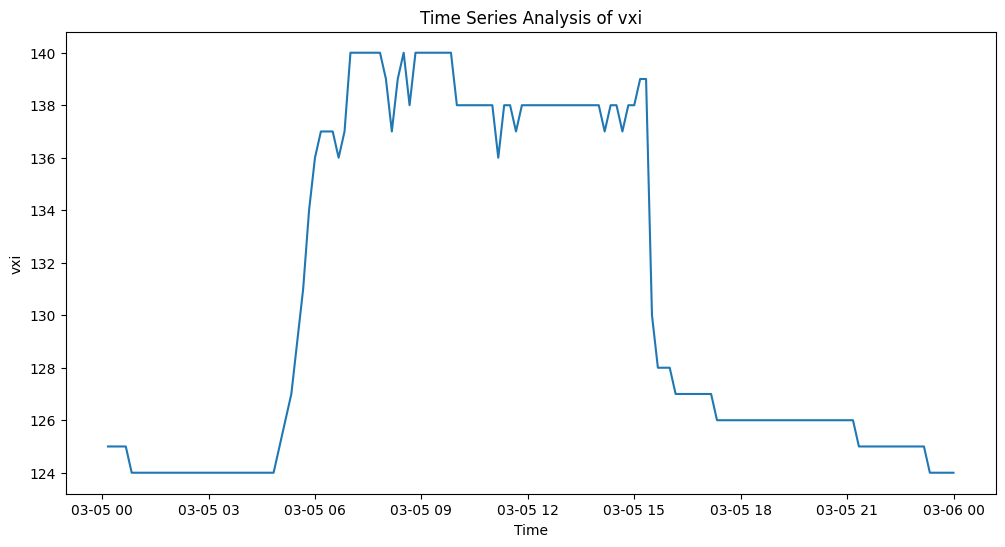

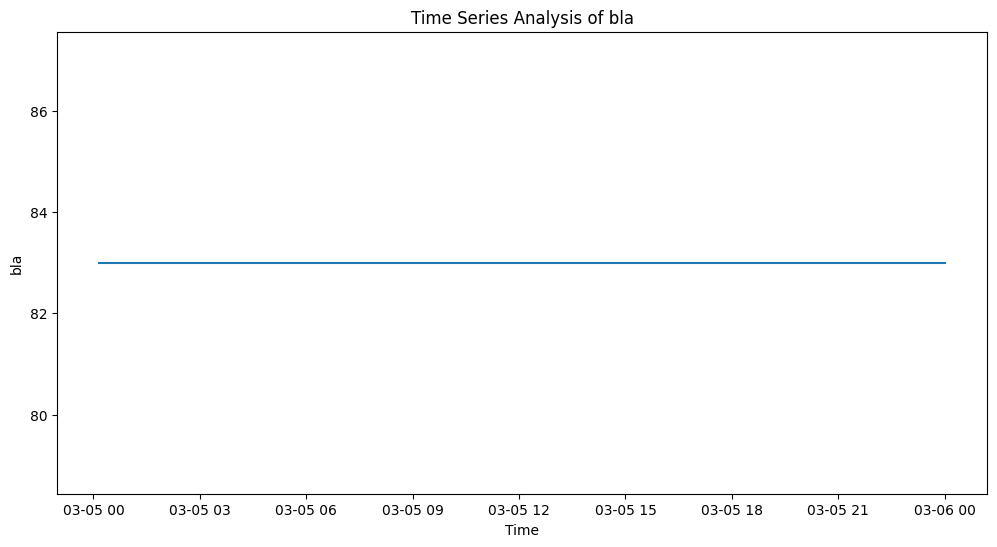

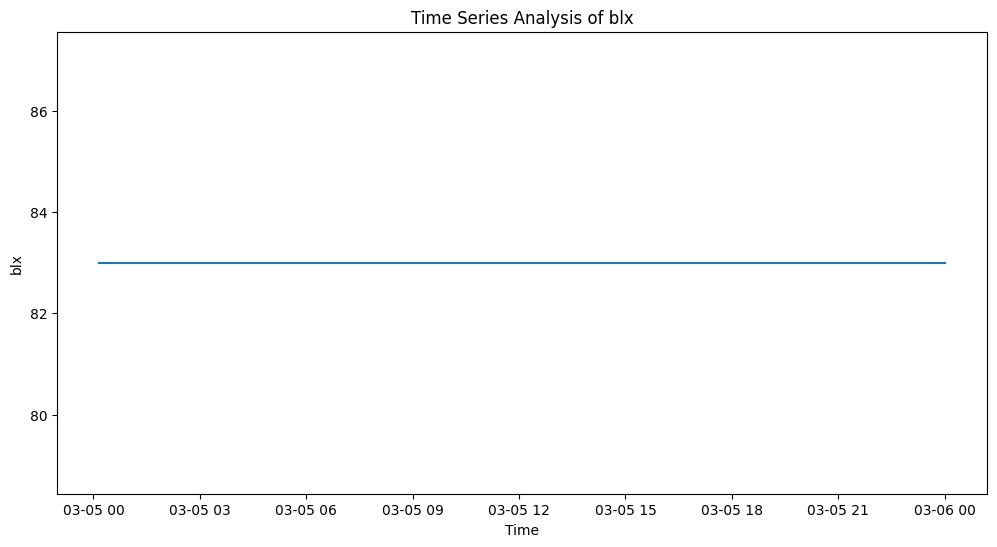

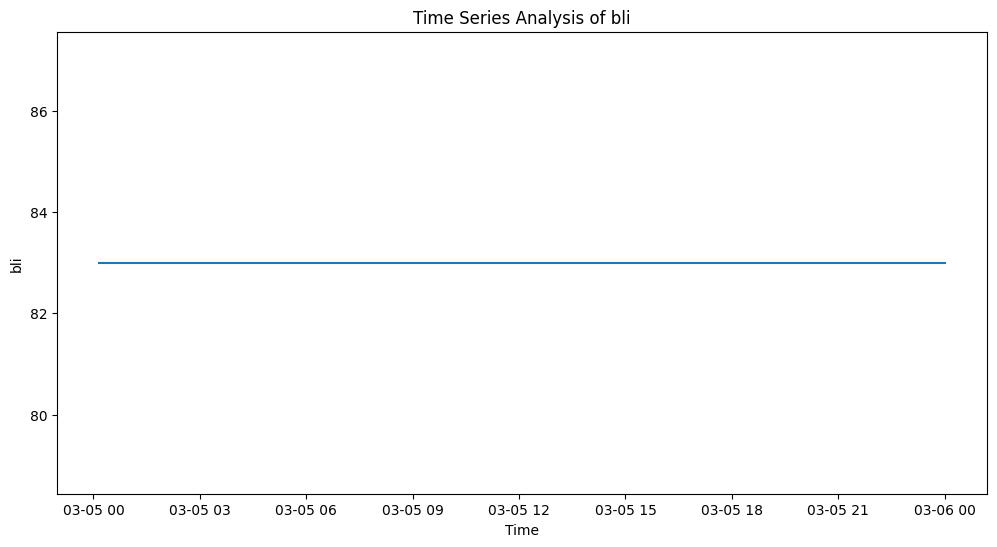

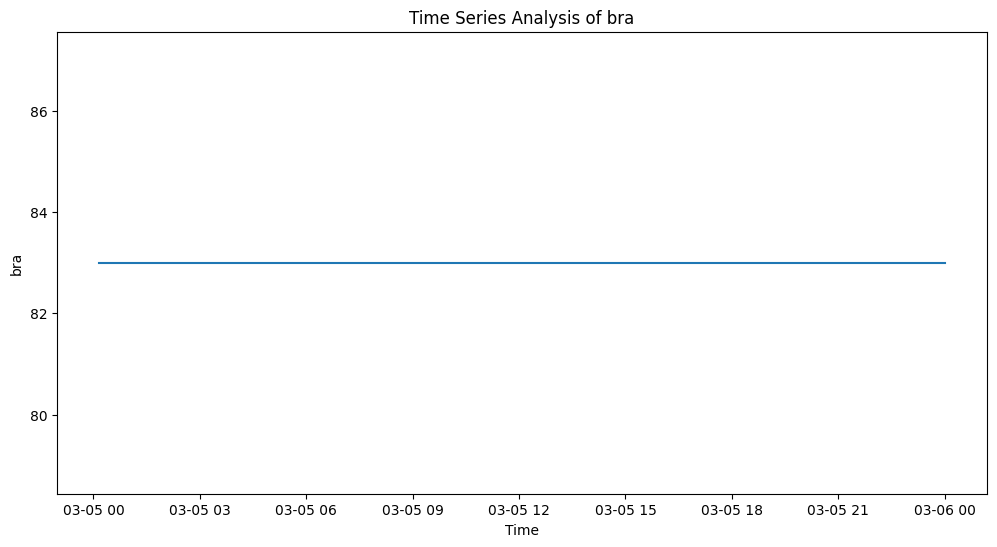

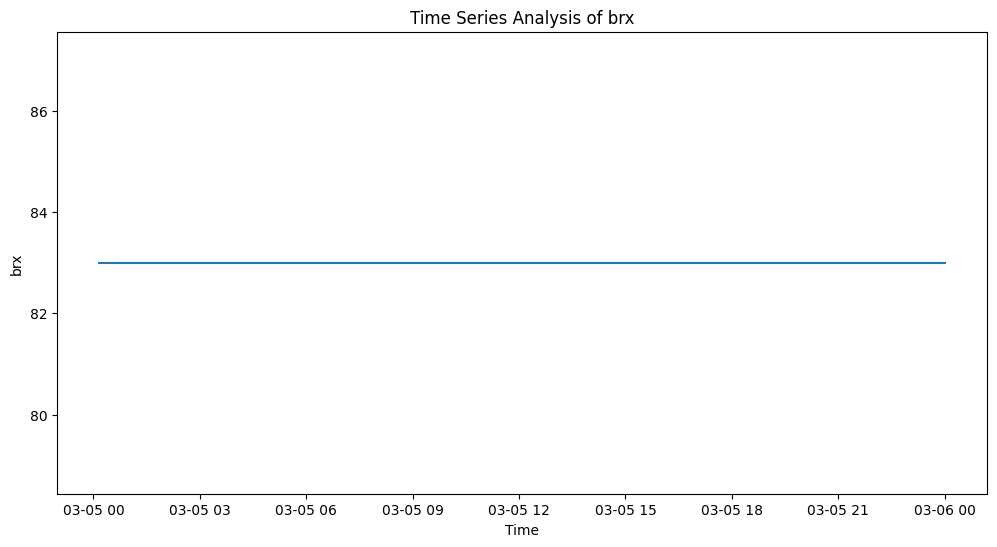

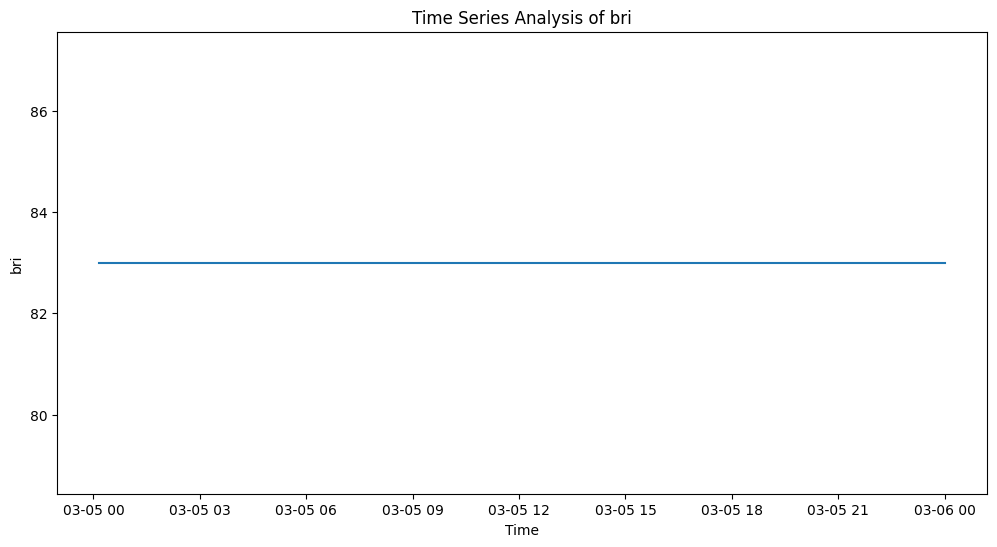

In [16]:
# Perform time series analysis for each column
for column in df.columns:
    if column not in ['date', 'time', 'period']:
        plt.figure(figsize=(12, 6))
        sns.lineplot(x=df.index, y=df[column])
        plt.title(f'Time Series Analysis of {column}')
        plt.xlabel('Time')
        plt.ylabel(column)
        plt.show()

In [17]:
# Exclude columns from correlation analysis
columns_to_exclude = ['datetime', 'date', 'time', 'period']
columns_for_correlation = [col for col in df.columns if col not in columns_to_exclude]

# Calculate correlation matrix
correlation_matrix = df[columns_for_correlation].corr()
#print(correlation_matrix)

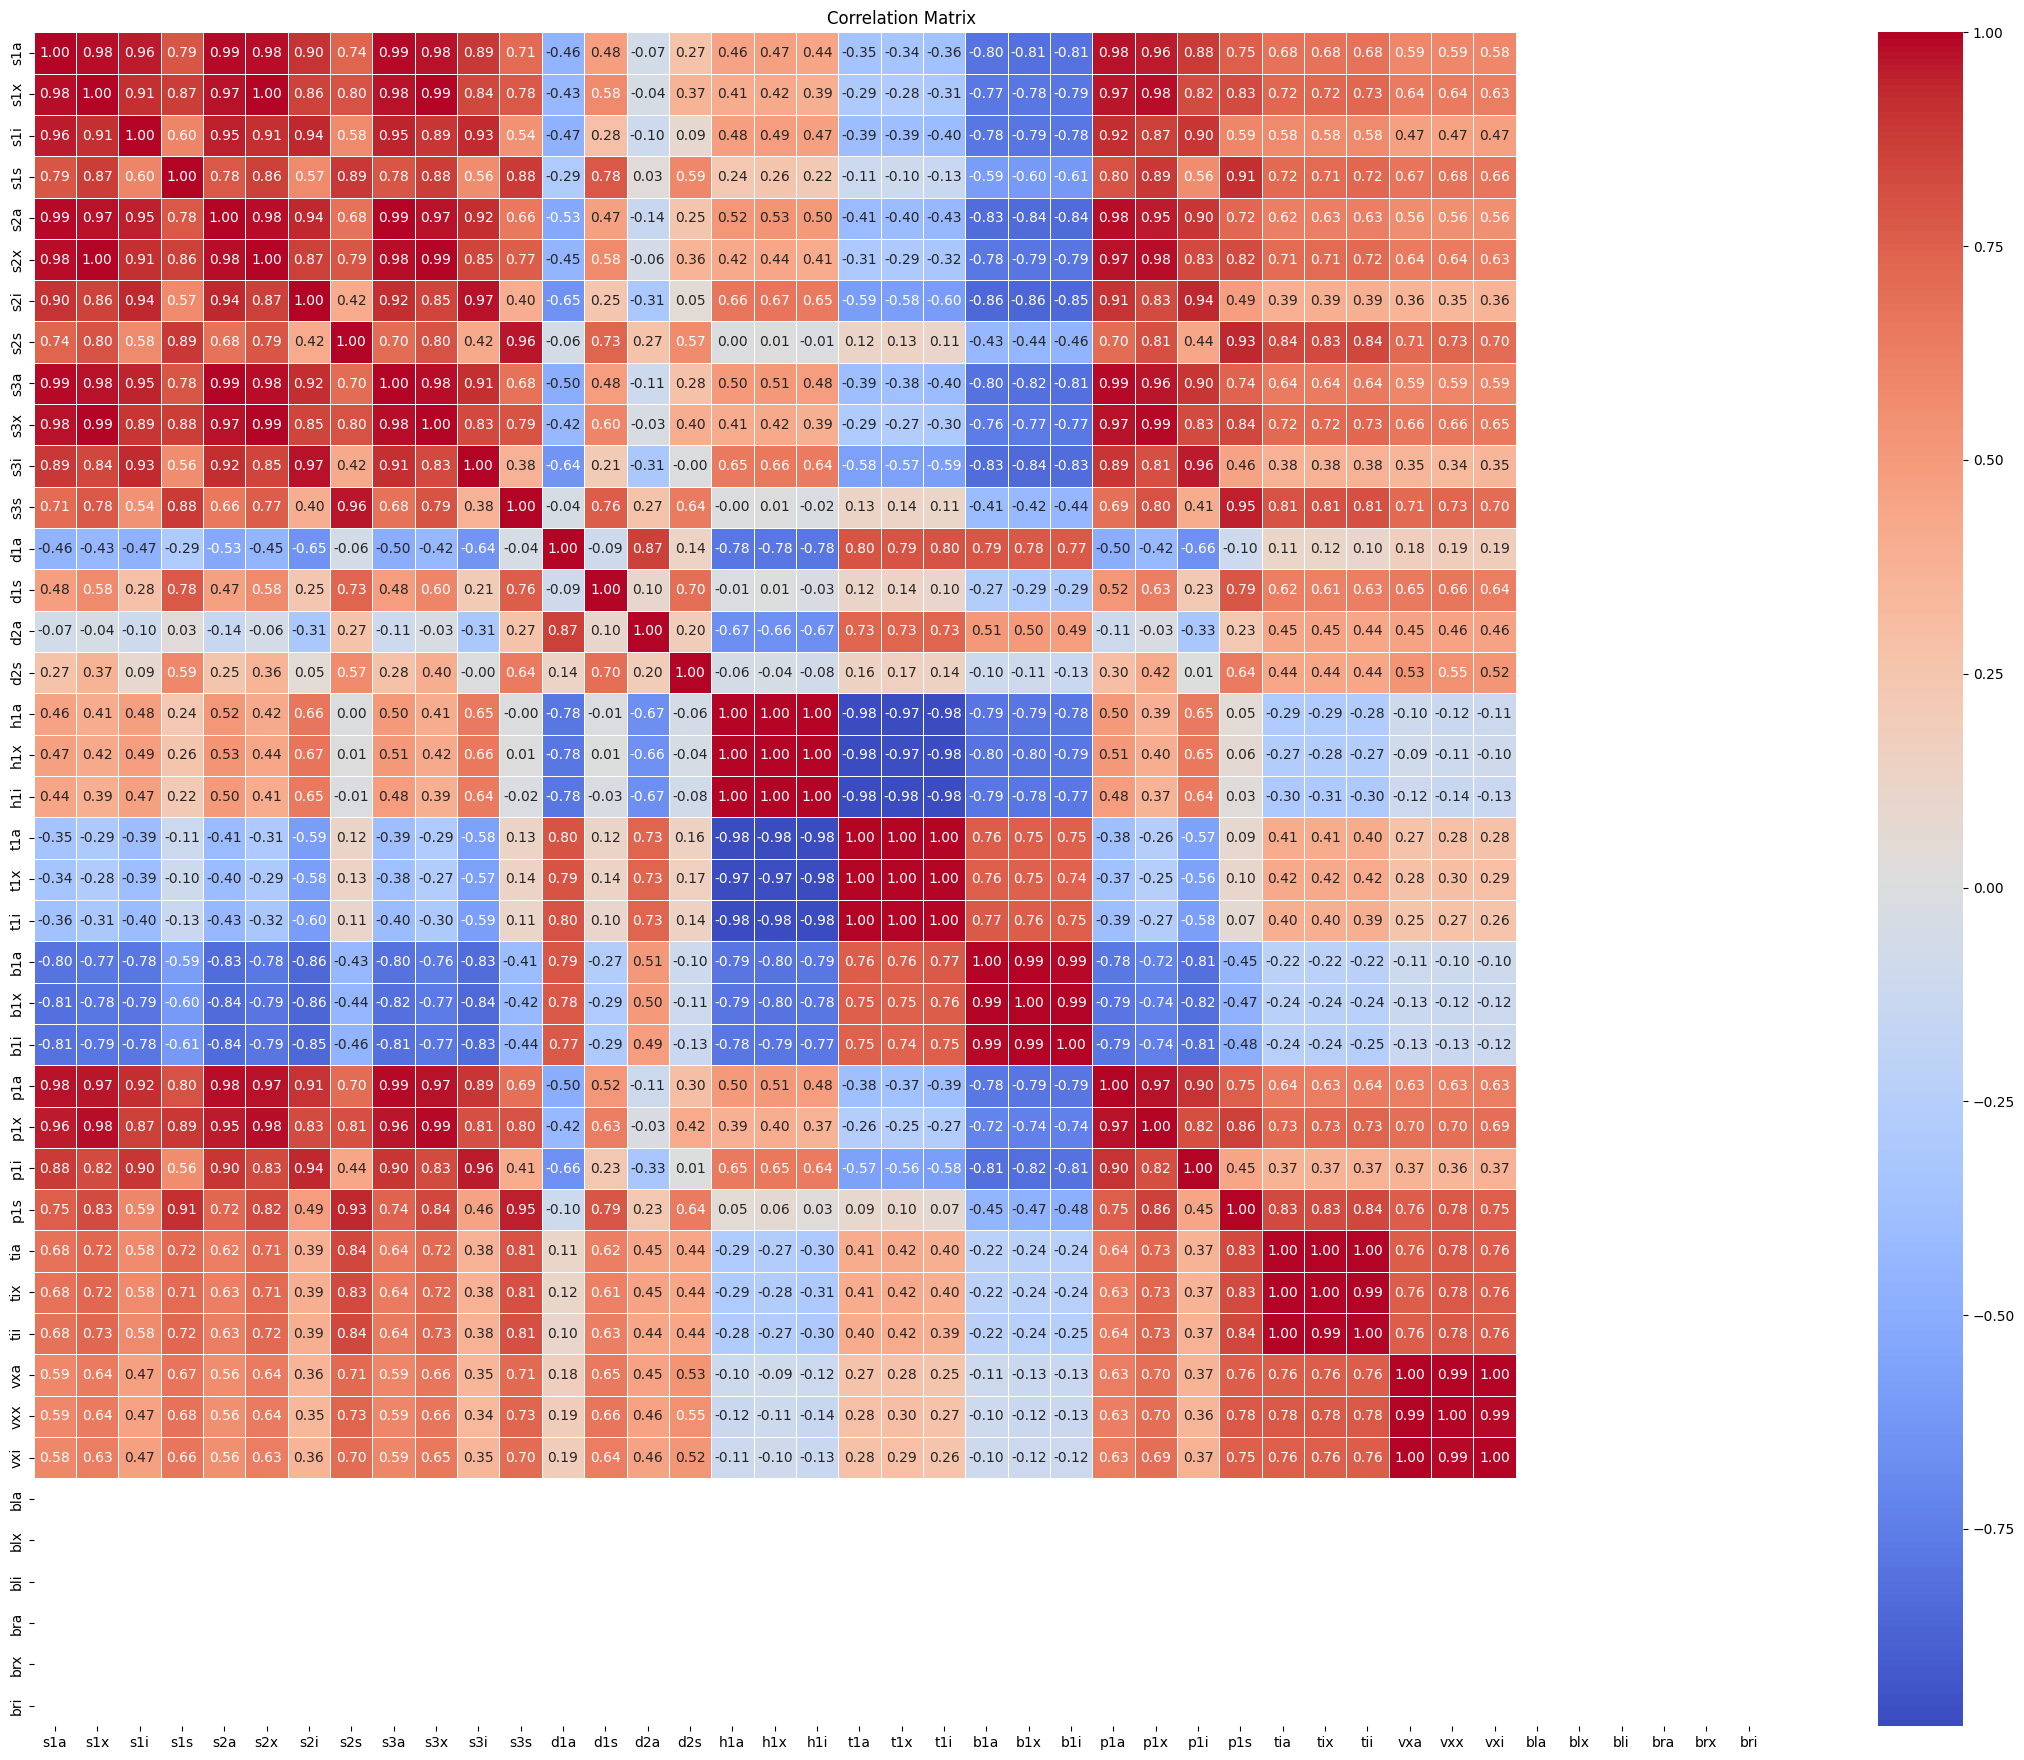

In [18]:
# Create a heatmap for the correlation matrix
#  The heatmap displays the correlation coefficients between different columns. 
# Positive values indicate a positive correlation, while negative values indicate a negative correlation. 
# Values closer to 1 or -1 indicate stronger correlations.
plt.figure(figsize=(28, 22))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

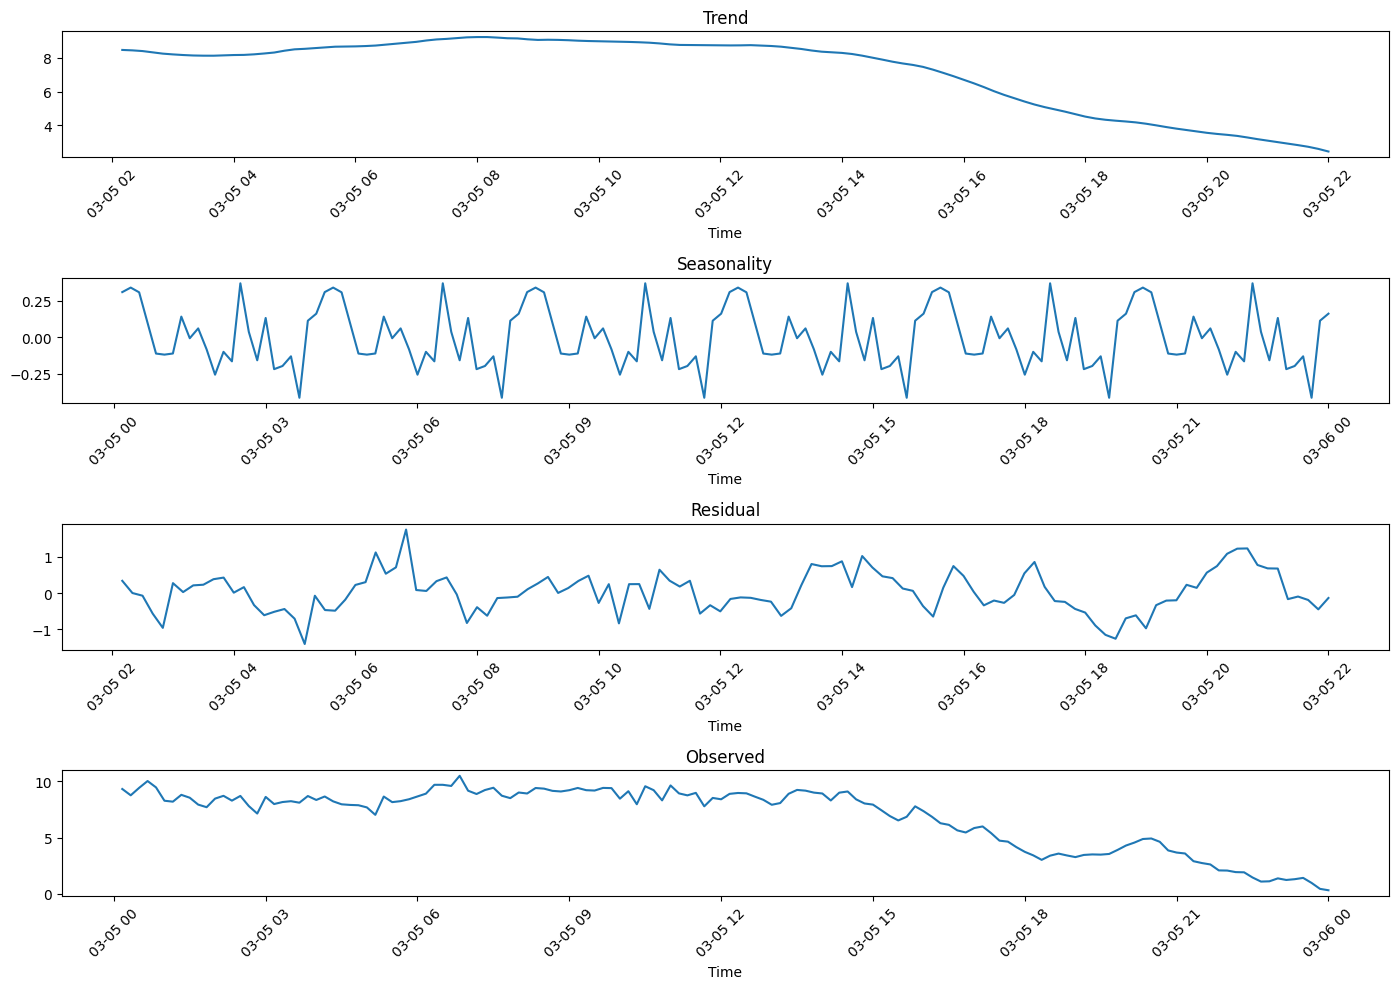

In [19]:
# Decompose the time series into trend, seasonality, and residual components
result = seasonal_decompose(df['s1a'], model='additive', period=24)  # Assuming seasonality is daily (24 hours)

# Increase figure size
plt.figure(figsize=(14, 10))

# Plot decomposed components
plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residual')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.subplot(4, 1, 4)
plt.plot(result.observed)
plt.title('Observed')
plt.xlabel('Time')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10T will be used.
  self._init_dates(dates, freq)
/Users/mpillodi/anaconda3/envs/windanalysis/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


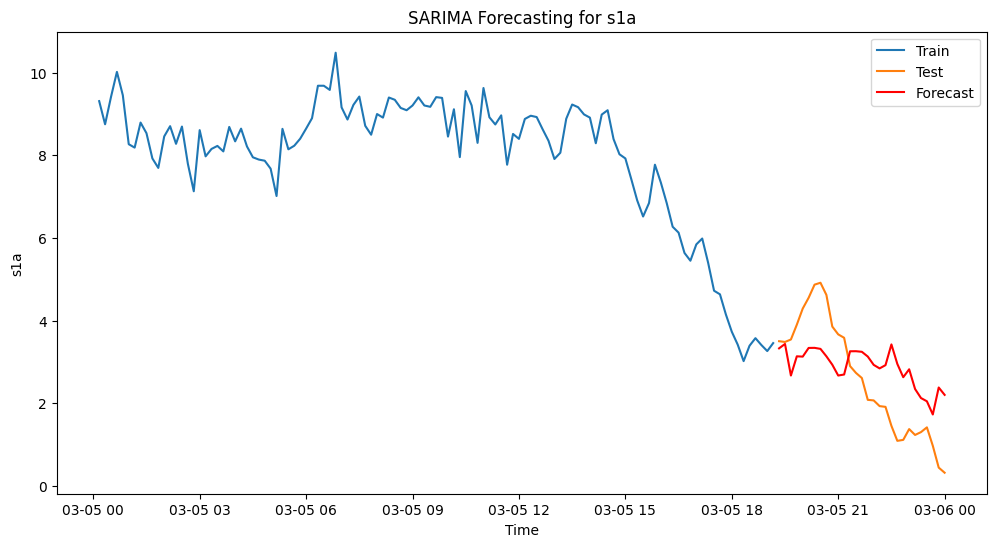

In [20]:
# Forecasting using SARIMA (Seasonal AutoRegressive Integrated Moving Average)
# Train-test split
train_size = int(len(df['s1a']) * 0.8)
train, test = df['s1a'][:train_size], df['s1a'][train_size:]

# Model fitting
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 24))  # Adjust order and seasonal_order as needed
fit_model = model.fit(disp=False)

# Forecast
forecast = fit_model.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

# Visualize
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('SARIMA Forecasting for s1a')
plt.xlabel('Time')
plt.ylabel('s1a')
plt.legend()
plt.show()